In [67]:
import os
import pickle
from glob import iglob
import numpy as np
import librosa
import random

DATA_AUDIO_DIR = './Voices_wav'
OUTPUT_DIR = './output'
TEST_DIR = './Voices_mult/test'
TRAIN_DIR = './Voices_mult/train'
OUTPUT_TRAIN = os.path.join(OUTPUT_DIR, 'train')
OUTPUT_TEST = os.path.join(OUTPUT_DIR, 'test')
AUDIO_LENGTH = 10000
FINAL_SR = 8000
manipulation_const = 0.002

class_ids = {
    'one': 0,
    'two': 1,
    'three': 2,
    'four': 3,
    'five': 4,
}
def extract_id(wav_filename):
    if 'one' in wav_filename:
        return class_ids.get('one')
    elif 'two' in wav_filename:
        return class_ids.get('two')
    elif 'three' in wav_filename:
        return class_ids.get('three')
    elif 'four' in wav_filename:
        return class_ids.get('four')
    elif 'five' in wav_filename:
        return class_ids.get('five')
    else:
        return class_ids.get('unlabelled')

def read_audio_from_filename(filename, final_sr):
    audio, _ = librosa.load(filename, sr=final_sr, mono=True)
    audio = audio.reshape(-1, 1)

In [74]:

def manipulate(data):
        noise = np.random.randn(len(data))
        augmented_data = data + manipulation_const * noise
        augmented_data = augmented_data.astype(type(data[0]))
        return augmented_data

for i, wav_filename in enumerate(iglob(os.path.join(DATA_AUDIO_DIR, '**/**.wav'), recursive=True)):                 
        print(wav_filename)
        class_id = extract_id(wav_filename)
        file_name = os.path.splitext(os.path.basename(wav_filename))[0]
        dest_path = os.path.dirname(wav_filename)
        
        output_folder = TRAIN_DIR
        if i < 70:
            output_folder = TEST_DIR
        
        audio, sr = librosa.load(wav_filename, mono=True)
        audios = {}
        
        audios[0] = audio
        audios[1] = librosa.effects.time_stretch(audio, 0.8)
        audios[2] = librosa.effects.time_stretch(audio, 1.2)
        audios[3] = librosa.effects.pitch_shift(audio, sr, n_steps=3)
        audios[4] = librosa.effects.pitch_shift(audio, sr, n_steps=-3)
        _, audios[5] = librosa.effects.hpss(audio)
        audios[6] = librosa.effects.percussive(audio)
        audios[7] = librosa.effects.preemphasis(audio)
        audios[8] = manipulate(audios[0])
        audios[9] = manipulate(audios[1])
        audios[10] = manipulate(audios[2])
        audios[11] = manipulate(audios[3])
        audios[12] = manipulate(audios[4])
        for j in range(len(audios)): 
            output_filename = os.path.join(output_folder, file_name + str(j) + '.wav')
            librosa.output.write_wav(output_filename, audios[j], sr)


./Voices_wav\0-test\five -test (1).wav
./Voices_wav\0-test\five -test (10).wav
./Voices_wav\0-test\five -test (11).wav
./Voices_wav\0-test\five -test (12).wav
./Voices_wav\0-test\five -test (13).wav
./Voices_wav\0-test\five -test (14).wav
./Voices_wav\0-test\five -test (2).wav
./Voices_wav\0-test\five -test (3).wav
./Voices_wav\0-test\five -test (4).wav
./Voices_wav\0-test\five -test (5).wav
./Voices_wav\0-test\five -test (6).wav
./Voices_wav\0-test\five -test (7).wav
./Voices_wav\0-test\five -test (8).wav
./Voices_wav\0-test\five -test (9).wav
./Voices_wav\0-test\four -test (1).wav
./Voices_wav\0-test\four -test (10).wav
./Voices_wav\0-test\four -test (11).wav
./Voices_wav\0-test\four -test (12).wav
./Voices_wav\0-test\four -test (13).wav
./Voices_wav\0-test\four -test (14).wav
./Voices_wav\0-test\four -test (2).wav
./Voices_wav\0-test\four -test (3).wav
./Voices_wav\0-test\four -test (4).wav
./Voices_wav\0-test\four -test (5).wav
./Voices_wav\0-test\four -test (6).wav
./Voices_wav\0-

./Voices_wav\2\two (5).wav
./Voices_wav\2\two (50).wav
./Voices_wav\2\two (51).wav
./Voices_wav\2\two (52).wav
./Voices_wav\2\two (53).wav
./Voices_wav\2\two (54).wav
./Voices_wav\2\two (55).wav
./Voices_wav\2\two (56).wav
./Voices_wav\2\two (57).wav
./Voices_wav\2\two (58).wav
./Voices_wav\2\two (59).wav
./Voices_wav\2\two (6).wav
./Voices_wav\2\two (60).wav
./Voices_wav\2\two (61).wav
./Voices_wav\2\two (62).wav
./Voices_wav\2\two (63).wav
./Voices_wav\2\two (64).wav
./Voices_wav\2\two (65).wav
./Voices_wav\2\two (66).wav
./Voices_wav\2\two (67).wav
./Voices_wav\2\two (68).wav
./Voices_wav\2\two (69).wav
./Voices_wav\2\two (7).wav
./Voices_wav\2\two (70).wav
./Voices_wav\2\two (71).wav
./Voices_wav\2\two (72).wav
./Voices_wav\2\two (73).wav
./Voices_wav\2\two (74).wav
./Voices_wav\2\two (75).wav
./Voices_wav\2\two (76).wav
./Voices_wav\2\two (77).wav
./Voices_wav\2\two (78).wav
./Voices_wav\2\two (79).wav
./Voices_wav\2\two (8).wav
./Voices_wav\2\two (80).wav
./Voices_wav\2\two (81).

./Voices_wav\4\four (81).wav
./Voices_wav\4\four (82).wav
./Voices_wav\4\four (83).wav
./Voices_wav\4\four (84).wav
./Voices_wav\4\four (85).wav
./Voices_wav\4\four (86).wav
./Voices_wav\4\four (87).wav
./Voices_wav\4\four (88).wav
./Voices_wav\4\four (89).wav
./Voices_wav\4\four (9).wav
./Voices_wav\4\four (90).wav
./Voices_wav\4\four (91).wav
./Voices_wav\4\four (92).wav
./Voices_wav\4\four (93).wav
./Voices_wav\4\four (94).wav
./Voices_wav\4\four (95).wav
./Voices_wav\4\four (96).wav
./Voices_wav\4\four (97).wav
./Voices_wav\4\four (98).wav
./Voices_wav\4\four (99).wav
./Voices_wav\5\five (1).wav
./Voices_wav\5\five (10).wav
./Voices_wav\5\five (100).wav
./Voices_wav\5\five (101).wav
./Voices_wav\5\five (102).wav
./Voices_wav\5\five (103).wav
./Voices_wav\5\five (104).wav
./Voices_wav\5\five (105).wav
./Voices_wav\5\five (106).wav
./Voices_wav\5\five (107).wav
./Voices_wav\5\five (108).wav
./Voices_wav\5\five (109).wav
./Voices_wav\5\five (11).wav
./Voices_wav\5\five (110).wav
./Voi

sr: 22050
wav shape: (45159,)
length: 2.048027210884354 secs


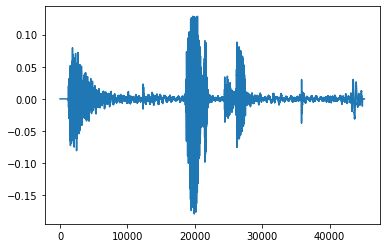

In [112]:
import random as rn
import matplotlib.pyplot as plt

DATA_DIR_1 = './Voices_wav/1/'
random_file = rn.choice(os.listdir(DATA_DIR_1))
wav_rand, sr_rand = librosa.load(DATA_DIR_1 + random_file)
print ('sr:', sr_rand)
print ('wav shape:', wav_rand.shape)
print ('length:', wav_rand.shape[0]/float(sr_rand), 'secs')
plt.plot(wav_rand)


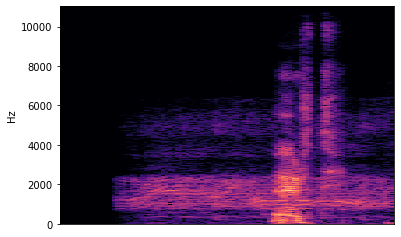

In [111]:
import librosa.display
D = librosa.amplitude_to_db(np.abs(librosa.stft(wav_rand)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')

sr: 22050
wav shape: (32256,)
length: 1.4628571428571429 secs


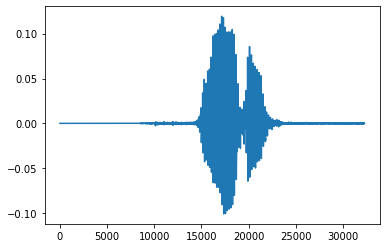

In [113]:
DATA_DIR_2 = './Voices_wav/2/'
random_file = rn.choice(os.listdir(DATA_DIR_2))
wav_rand, sr_rand = librosa.load(DATA_DIR_2 + random_file)
print ('sr:', sr_rand)
print ('wav shape:', wav_rand.shape)
print ('length:', wav_rand.shape[0]/float(sr_rand), 'secs')
plt.plot(wav_rand)

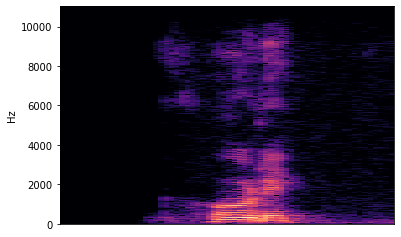

In [114]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(wav_rand)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')

sr: 22050
wav shape: (40896,)
length: 1.8546938775510204 secs


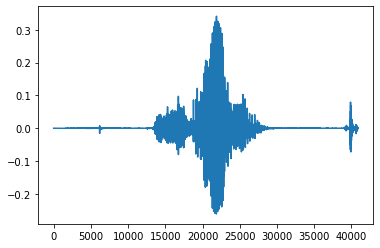

In [115]:
DATA_DIR_3 = './Voices_wav/3/'
random_file = rn.choice(os.listdir(DATA_DIR_3))
wav_rand, sr_rand = librosa.load(DATA_DIR_3 + random_file)
print ('sr:', sr_rand)
print ('wav shape:', wav_rand.shape)
print ('length:', wav_rand.shape[0]/float(sr_rand), 'secs')
plt.plot(wav_rand)

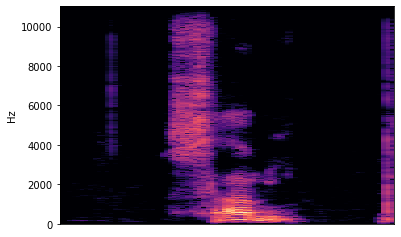

In [116]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(wav_rand)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')

sr: 22050
wav shape: (36692,)
length: 1.6640362811791383 secs


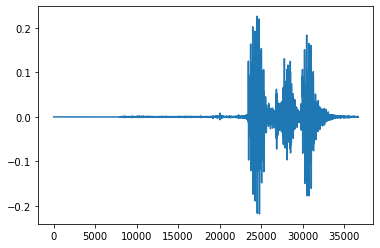

In [117]:
DATA_DIR_4 = './Voices_wav/4/'
random_file = rn.choice(os.listdir(DATA_DIR_4))
wav_rand, sr_rand = librosa.load(DATA_DIR_4 + random_file)
print ('sr:', sr_rand)
print ('wav shape:', wav_rand.shape)
print ('length:', wav_rand.shape[0]/float(sr_rand), 'secs')
plt.plot(wav_rand)

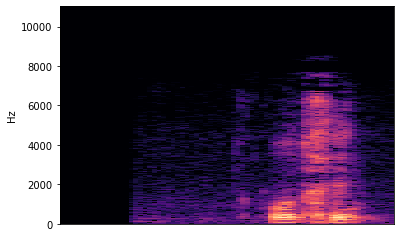

In [118]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(wav_rand)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')

sr: 22050
wav shape: (11232,)
length: 0.5093877551020408 secs


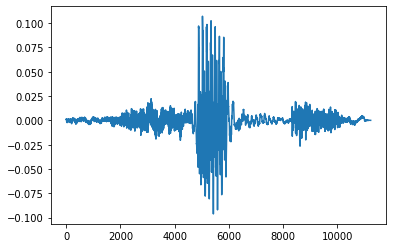

In [119]:
DATA_DIR_5 = './Voices_wav/5/'
random_file = rn.choice(os.listdir(DATA_DIR_5))
wav_rand, sr_rand = librosa.load(DATA_DIR_5 + random_file)
print ('sr:', sr_rand)
print ('wav shape:', wav_rand.shape)
print ('length:', wav_rand.shape[0]/float(sr_rand), 'secs')
plt.plot(wav_rand)

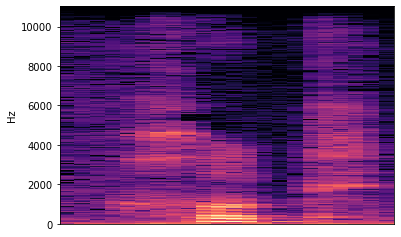

In [120]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(wav_rand)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')

In [104]:
DATA_AUDIO_DIR = './Voices_mult'
OUTPUT_DIR = './output'
OUTPUT_TRAIN = os.path.join(OUTPUT_DIR, 'train')
OUTPUT_TEST = os.path.join(OUTPUT_DIR, 'test')
import random


def extract_id(wav_filename):
    if 'one' in wav_filename:
        return class_ids.get('one')
    elif 'two' in wav_filename:
        return class_ids.get('two')
    elif 'three' in wav_filename:
        return class_ids.get('three')
    elif 'four' in wav_filename:
        return class_ids.get('four')
    elif 'five' in wav_filename:
        return class_ids.get('five')
    else:
        return class_ids.get('unlabelled')

def read_audio_from_filename(filename, final_sr):
    audio, _ = librosa.load(filename, sr=final_sr, mono=True)
    audio = audio.reshape(-1, 1)
    return audio

def prepare_all_data():
    for i, wav_filename in enumerate(iglob(os.path.join(DATA_AUDIO_DIR, '**/**.wav'), recursive=True)):
        class_id = extract_id(wav_filename)
        audio_b = read_audio_from_filename(wav_filename, final_sr=FINAL_SR)
        audio_buf_final = (audio_b - np.mean(audio_b)) / np.std(audio_b)
        original_length = len(audio_buf_final)
        print(i, wav_filename, original_length, np.round(np.mean(audio_buf_final), 4), np.std(audio_buf_final))
        
        if original_length < AUDIO_LENGTH:
            audio_buf_final = np.concatenate((audio_buf_final, np.zeros(shape=(AUDIO_LENGTH - original_length, 1))))
            print('PAD New length =', len(audio_buf_final))
        elif original_length > AUDIO_LENGTH:
            audio_buf_final = audio_buf_final[0:AUDIO_LENGTH]
            print('CUT New length =', len(audio_buf_final))

        output_folder = OUTPUT_TRAIN
        if  i < 910:
            output_folder = OUTPUT_TEST

        output_filename = os.path.join(output_folder, str(i) + '.pkl')
        file_name = os.path.splitext(os.path.basename(wav_filename))[0]
        pkl_out = {'class_id': class_id,  'audio': audio_buf_final, 'sr': FINAL_SR}
        with open(output_filename, 'wb') as w:
            pickle.dump(pkl_out, w)


if __name__ == '__main__':
    prepare_all_data()

0 ./Voices_mult\test\five -test (1)0.wav 10240 0.0 1.0
CUT New length = 10000
1 ./Voices_mult\test\five -test (1)1.wav 12800 -0.0 1.0
CUT New length = 10000
2 ./Voices_mult\test\five -test (1)10.wav 8534 -0.0 1.0
PAD New length = 10000
3 ./Voices_mult\test\five -test (1)11.wav 10240 -0.0 0.99999994
CUT New length = 10000
4 ./Voices_mult\test\five -test (1)12.wav 10240 -0.0 1.0
CUT New length = 10000
5 ./Voices_mult\test\five -test (1)2.wav 8534 -0.0 1.0
PAD New length = 10000
6 ./Voices_mult\test\five -test (1)3.wav 10240 0.0 0.99999994
CUT New length = 10000
7 ./Voices_mult\test\five -test (1)4.wav 10240 -0.0 1.0
CUT New length = 10000
8 ./Voices_mult\test\five -test (1)5.wav 10240 0.0 1.0
CUT New length = 10000
9 ./Voices_mult\test\five -test (1)6.wav 10240 0.0 1.0
CUT New length = 10000
10 ./Voices_mult\test\five -test (1)7.wav 10240 0.0 1.0
CUT New length = 10000
11 ./Voices_mult\test\five -test (1)8.wav 10240 -0.0 1.0
CUT New length = 10000
12 ./Voices_mult\test\five -test (1)9.wa

101 ./Voices_mult\test\five -test (3)7.wav 22361 -0.0 0.9999999
CUT New length = 10000
102 ./Voices_mult\test\five -test (3)8.wav 22361 -0.0 1.0
CUT New length = 10000
103 ./Voices_mult\test\five -test (3)9.wav 27952 -0.0 0.99999994
CUT New length = 10000
104 ./Voices_mult\test\five -test (4)0.wav 16719 0.0 1.0
CUT New length = 10000
105 ./Voices_mult\test\five -test (4)1.wav 20898 0.0 1.0
CUT New length = 10000
106 ./Voices_mult\test\five -test (4)10.wav 13932 -0.0 0.9999998
CUT New length = 10000
107 ./Voices_mult\test\five -test (4)11.wav 16719 0.0 1.0
CUT New length = 10000
108 ./Voices_mult\test\five -test (4)12.wav 16719 -0.0 1.0
CUT New length = 10000
109 ./Voices_mult\test\five -test (4)2.wav 13932 -0.0 0.99999994
CUT New length = 10000
110 ./Voices_mult\test\five -test (4)3.wav 16719 0.0 0.9999999
CUT New length = 10000
111 ./Voices_mult\test\five -test (4)4.wav 16719 0.0 1.0000001
CUT New length = 10000
112 ./Voices_mult\test\five -test (4)5.wav 16719 -0.0 0.99999994
CUT New 

201 ./Voices_mult\test\four -test (10)3.wav 8011 0.0 0.99999994
PAD New length = 10000
202 ./Voices_mult\test\four -test (10)4.wav 8011 0.0 1.0
PAD New length = 10000
203 ./Voices_mult\test\four -test (10)5.wav 8011 0.0 0.9999999
PAD New length = 10000
204 ./Voices_mult\test\four -test (10)6.wav 8011 0.0 0.9999999
PAD New length = 10000
205 ./Voices_mult\test\four -test (10)7.wav 8011 -0.0 1.0
PAD New length = 10000
206 ./Voices_mult\test\four -test (10)8.wav 8011 0.0 0.99999994
PAD New length = 10000
207 ./Voices_mult\test\four -test (10)9.wav 10014 0.0 1.0
CUT New length = 10000
208 ./Voices_mult\test\four -test (11)0.wav 12960 0.0 1.0
CUT New length = 10000
209 ./Voices_mult\test\four -test (11)1.wav 16200 -0.0 1.0
CUT New length = 10000
210 ./Voices_mult\test\four -test (11)10.wav 10801 0.0 0.9999998
CUT New length = 10000
211 ./Voices_mult\test\four -test (11)11.wav 12960 0.0 0.9999999
CUT New length = 10000
212 ./Voices_mult\test\four -test (11)12.wav 12960 0.0 1.0
CUT New length

302 ./Voices_mult\test\four -test (5)11.wav 14211 0.0 1.0000001
CUT New length = 10000
303 ./Voices_mult\test\four -test (5)12.wav 14211 0.0 1.0
CUT New length = 10000
304 ./Voices_mult\test\four -test (5)2.wav 11843 -0.0 1.0
CUT New length = 10000
305 ./Voices_mult\test\four -test (5)3.wav 14211 -0.0 1.0
CUT New length = 10000
306 ./Voices_mult\test\four -test (5)4.wav 14211 -0.0 1.0
CUT New length = 10000
307 ./Voices_mult\test\four -test (5)5.wav 14211 0.0 1.0
CUT New length = 10000
308 ./Voices_mult\test\four -test (5)6.wav 14211 0.0 1.0
CUT New length = 10000
309 ./Voices_mult\test\four -test (5)7.wav 14211 -0.0 1.0
CUT New length = 10000
310 ./Voices_mult\test\four -test (5)8.wav 14211 -0.0 1.0
CUT New length = 10000
311 ./Voices_mult\test\four -test (5)9.wav 17764 0.0 0.99999994
CUT New length = 10000
312 ./Voices_mult\test\four -test (6)0.wav 15256 -0.0 1.0
CUT New length = 10000
313 ./Voices_mult\test\four -test (6)1.wav 19070 -0.0 0.9999999
CUT New length = 10000
314 ./Voices

402 ./Voices_mult\test\one -test (11)9.wav 15134 -0.0 0.99999994
CUT New length = 10000
403 ./Voices_mult\test\one -test (12)0.wav 13654 0.0 1.0
CUT New length = 10000
404 ./Voices_mult\test\one -test (12)1.wav 17067 0.0 1.0
CUT New length = 10000
405 ./Voices_mult\test\one -test (12)10.wav 11378 0.0 1.0
CUT New length = 10000
406 ./Voices_mult\test\one -test (12)11.wav 13654 -0.0 0.99999994
CUT New length = 10000
407 ./Voices_mult\test\one -test (12)12.wav 13654 -0.0 1.0
CUT New length = 10000
408 ./Voices_mult\test\one -test (12)2.wav 11378 -0.0 1.0
CUT New length = 10000
409 ./Voices_mult\test\one -test (12)3.wav 13654 0.0 1.0
CUT New length = 10000
410 ./Voices_mult\test\one -test (12)4.wav 13654 0.0 0.99999994
CUT New length = 10000
411 ./Voices_mult\test\one -test (12)5.wav 13654 -0.0 0.99999994
CUT New length = 10000
412 ./Voices_mult\test\one -test (12)6.wav 13654 -0.0 0.99999994
CUT New length = 10000
413 ./Voices_mult\test\one -test (12)7.wav 13654 0.0 1.0
CUT New length = 10

503 ./Voices_mult\test\one -test (6)6.wav 12121 0.0 1.0
CUT New length = 10000
504 ./Voices_mult\test\one -test (6)7.wav 12121 -0.0 0.99999994
CUT New length = 10000
505 ./Voices_mult\test\one -test (6)8.wav 12121 -0.0 0.99999994
CUT New length = 10000
506 ./Voices_mult\test\one -test (6)9.wav 15152 0.0 1.0
CUT New length = 10000
507 ./Voices_mult\test\one -test (7)0.wav 17137 -0.0 1.0
CUT New length = 10000
508 ./Voices_mult\test\one -test (7)1.wav 21421 0.0 0.99999994
CUT New length = 10000
509 ./Voices_mult\test\one -test (7)10.wav 14281 0.0 0.99999994
CUT New length = 10000
510 ./Voices_mult\test\one -test (7)11.wav 17137 -0.0 0.99999994
CUT New length = 10000
511 ./Voices_mult\test\one -test (7)12.wav 17137 0.0 1.0
CUT New length = 10000
512 ./Voices_mult\test\one -test (7)2.wav 14281 0.0 0.99999994
CUT New length = 10000
513 ./Voices_mult\test\one -test (7)3.wav 17137 -0.0 1.0
CUT New length = 10000
514 ./Voices_mult\test\one -test (7)4.wav 17137 -0.0 1.0
CUT New length = 10000
5

602 ./Voices_mult\test\three -test (13)12.wav 13995 -0.0 1.0
CUT New length = 10000
603 ./Voices_mult\test\three -test (13)2.wav 11663 -0.0 1.0
CUT New length = 10000
604 ./Voices_mult\test\three -test (13)3.wav 13995 0.0 0.99999994
CUT New length = 10000
605 ./Voices_mult\test\three -test (13)4.wav 13995 -0.0 0.99999994
CUT New length = 10000
606 ./Voices_mult\test\three -test (13)5.wav 13995 -0.0 1.0
CUT New length = 10000
607 ./Voices_mult\test\three -test (13)6.wav 13995 -0.0 1.0
CUT New length = 10000
608 ./Voices_mult\test\three -test (13)7.wav 13995 0.0 0.99999994
CUT New length = 10000
609 ./Voices_mult\test\three -test (13)8.wav 13995 0.0 1.0
CUT New length = 10000
610 ./Voices_mult\test\three -test (13)9.wav 17494 0.0 1.0
CUT New length = 10000
611 ./Voices_mult\test\three -test (14)0.wav 15702 0.0 1.0
CUT New length = 10000
612 ./Voices_mult\test\three -test (14)1.wav 19627 -0.0 1.0
CUT New length = 10000
613 ./Voices_mult\test\three -test (14)10.wav 13085 0.0 1.0
CUT New le

PAD New length = 10000
700 ./Voices_mult\test\three -test (7)8.wav 9614 -0.0 1.0
PAD New length = 10000
701 ./Voices_mult\test\three -test (7)9.wav 12017 0.0 1.0
CUT New length = 10000
702 ./Voices_mult\test\three -test (8)0.wav 15360 0.0 0.99999994
CUT New length = 10000
703 ./Voices_mult\test\three -test (8)1.wav 19200 -0.0 1.0
CUT New length = 10000
704 ./Voices_mult\test\three -test (8)10.wav 12800 0.0 0.99999994
CUT New length = 10000
705 ./Voices_mult\test\three -test (8)11.wav 15360 0.0 1.0
CUT New length = 10000
706 ./Voices_mult\test\three -test (8)12.wav 15360 -0.0 0.99999994
CUT New length = 10000
707 ./Voices_mult\test\three -test (8)2.wav 12800 0.0 0.9999999
CUT New length = 10000
708 ./Voices_mult\test\three -test (8)3.wav 15360 0.0 1.0
CUT New length = 10000
709 ./Voices_mult\test\three -test (8)4.wav 15360 -0.0 1.0
CUT New length = 10000
710 ./Voices_mult\test\three -test (8)5.wav 15360 0.0 0.99999994
CUT New length = 10000
711 ./Voices_mult\test\three -test (8)6.wav 15

900 ./Voices_mult\test\two -test (9)11.wav 12107 0.0 1.0
CUT New length = 10000
901 ./Voices_mult\test\two -test (9)12.wav 12107 -0.0 0.99999994
CUT New length = 10000
902 ./Voices_mult\test\two -test (9)2.wav 10090 0.0 1.0
CUT New length = 10000
903 ./Voices_mult\test\two -test (9)3.wav 12107 0.0 0.9999999
CUT New length = 10000
904 ./Voices_mult\test\two -test (9)4.wav 12107 -0.0 1.0
CUT New length = 10000
905 ./Voices_mult\test\two -test (9)5.wav 12107 0.0 1.0
CUT New length = 10000
906 ./Voices_mult\test\two -test (9)6.wav 12107 0.0 1.0
CUT New length = 10000
907 ./Voices_mult\test\two -test (9)7.wav 12107 0.0 1.0000001
CUT New length = 10000
908 ./Voices_mult\test\two -test (9)8.wav 12107 0.0 1.0
CUT New length = 10000
909 ./Voices_mult\test\two -test (9)9.wav 15134 -0.0 0.99999994
CUT New length = 10000
910 ./Voices_mult\train\five (1)0.wav 12800 -0.0 1.0
CUT New length = 10000
911 ./Voices_mult\train\five (1)1.wav 16000 0.0 1.0
CUT New length = 10000
912 ./Voices_mult\train\five

1006 ./Voices_mult\train\five (105)2.wav 8961 -0.0 1.0
PAD New length = 10000
1007 ./Voices_mult\train\five (105)3.wav 10753 0.0 1.0
CUT New length = 10000
1008 ./Voices_mult\train\five (105)4.wav 10753 -0.0 0.9999998
CUT New length = 10000
1009 ./Voices_mult\train\five (105)5.wav 10753 0.0 1.0000001
CUT New length = 10000
1010 ./Voices_mult\train\five (105)6.wav 10753 0.0 1.0000001
CUT New length = 10000
1011 ./Voices_mult\train\five (105)7.wav 10753 -0.0 1.0
CUT New length = 10000
1012 ./Voices_mult\train\five (105)8.wav 10753 0.0 1.0000001
CUT New length = 10000
1013 ./Voices_mult\train\five (105)9.wav 13441 -0.0 1.0
CUT New length = 10000
1014 ./Voices_mult\train\five (106)0.wav 9547 -0.0 0.9999999
PAD New length = 10000
1015 ./Voices_mult\train\five (106)1.wav 11934 0.0 1.0
CUT New length = 10000
1016 ./Voices_mult\train\five (106)10.wav 7956 0.0 1.0
PAD New length = 10000
1017 ./Voices_mult\train\five (106)11.wav 9547 0.0 0.99999994
PAD New length = 10000
1018 ./Voices_mult\train

1108 ./Voices_mult\train\five (112)11.wav 22466 -0.0 1.0
CUT New length = 10000
1109 ./Voices_mult\train\five (112)12.wav 22466 -0.0 1.0
CUT New length = 10000
1110 ./Voices_mult\train\five (112)2.wav 18722 0.0 1.0
CUT New length = 10000
1111 ./Voices_mult\train\five (112)3.wav 22466 0.0 1.0
CUT New length = 10000
1112 ./Voices_mult\train\five (112)4.wav 22466 -0.0 1.0
CUT New length = 10000
1113 ./Voices_mult\train\five (112)5.wav 22466 0.0 1.0
CUT New length = 10000
1114 ./Voices_mult\train\five (112)6.wav 22466 0.0 1.0
CUT New length = 10000
1115 ./Voices_mult\train\five (112)7.wav 22466 -0.0 1.0
CUT New length = 10000
1116 ./Voices_mult\train\five (112)8.wav 22466 -0.0 1.0
CUT New length = 10000
1117 ./Voices_mult\train\five (112)9.wav 28082 0.0 0.99999994
CUT New length = 10000
1118 ./Voices_mult\train\five (113)0.wav 20608 -0.0 1.0
CUT New length = 10000
1119 ./Voices_mult\train\five (113)1.wav 25760 -0.0 1.0
CUT New length = 10000
1120 ./Voices_mult\train\five (113)10.wav 17173 

1210 ./Voices_mult\train\five (12)1.wav 23685 0.0 1.0
CUT New length = 10000
1211 ./Voices_mult\train\five (12)10.wav 15790 -0.0 1.0
CUT New length = 10000
1212 ./Voices_mult\train\five (12)11.wav 18948 -0.0 1.0000001
CUT New length = 10000
1213 ./Voices_mult\train\five (12)12.wav 18948 -0.0 1.0
CUT New length = 10000
1214 ./Voices_mult\train\five (12)2.wav 15790 0.0 1.0
CUT New length = 10000
1215 ./Voices_mult\train\five (12)3.wav 18948 0.0 1.0
CUT New length = 10000
1216 ./Voices_mult\train\five (12)4.wav 18948 0.0 0.99999994
CUT New length = 10000
1217 ./Voices_mult\train\five (12)5.wav 18948 -0.0 0.99999994
CUT New length = 10000
1218 ./Voices_mult\train\five (12)6.wav 18948 -0.0 0.99999994
CUT New length = 10000
1219 ./Voices_mult\train\five (12)7.wav 18948 0.0 1.0
CUT New length = 10000
1220 ./Voices_mult\train\five (12)8.wav 18948 0.0 1.0
CUT New length = 10000
1221 ./Voices_mult\train\five (12)9.wav 23685 -0.0 1.0
CUT New length = 10000
1222 ./Voices_mult\train\five (120)0.wav

1315 ./Voices_mult\train\five (15)10.wav 13468 0.0 0.9999999
CUT New length = 10000
1316 ./Voices_mult\train\five (15)11.wav 16162 -0.0 0.9999999
CUT New length = 10000
1317 ./Voices_mult\train\five (15)12.wav 16162 -0.0 1.0
CUT New length = 10000
1318 ./Voices_mult\train\five (15)2.wav 13468 0.0 0.99999994
CUT New length = 10000
1319 ./Voices_mult\train\five (15)3.wav 16162 -0.0 0.99999994
CUT New length = 10000
1320 ./Voices_mult\train\five (15)4.wav 16162 0.0 1.0
CUT New length = 10000
1321 ./Voices_mult\train\five (15)5.wav 16162 -0.0 0.99999994
CUT New length = 10000
1322 ./Voices_mult\train\five (15)6.wav 16162 -0.0 0.99999994
CUT New length = 10000
1323 ./Voices_mult\train\five (15)7.wav 16162 -0.0 1.0
CUT New length = 10000
1324 ./Voices_mult\train\five (15)8.wav 16162 -0.0 0.99999994
CUT New length = 10000
1325 ./Voices_mult\train\five (15)9.wav 20202 0.0 0.99999994
CUT New length = 10000
1326 ./Voices_mult\train\five (16)0.wav 18019 0.0 1.0
CUT New length = 10000
1327 ./Voice

1419 ./Voices_mult\train\five (22)10.wav 11301 -0.0 0.99999994
CUT New length = 10000
1420 ./Voices_mult\train\five (22)11.wav 13561 0.0 0.99999994
CUT New length = 10000
1421 ./Voices_mult\train\five (22)12.wav 13561 0.0 1.0000001
CUT New length = 10000
1422 ./Voices_mult\train\five (22)2.wav 11301 -0.0 1.0
CUT New length = 10000
1423 ./Voices_mult\train\five (22)3.wav 13561 -0.0 0.99999994
CUT New length = 10000
1424 ./Voices_mult\train\five (22)4.wav 13561 -0.0 1.0
CUT New length = 10000
1425 ./Voices_mult\train\five (22)5.wav 13561 0.0 1.0
CUT New length = 10000
1426 ./Voices_mult\train\five (22)6.wav 13561 0.0 1.0
CUT New length = 10000
1427 ./Voices_mult\train\five (22)7.wav 13561 0.0 1.0
CUT New length = 10000
1428 ./Voices_mult\train\five (22)8.wav 13561 0.0 1.0
CUT New length = 10000
1429 ./Voices_mult\train\five (22)9.wav 16951 -0.0 1.0
CUT New length = 10000
1430 ./Voices_mult\train\five (23)0.wav 14676 -0.0 1.0
CUT New length = 10000
1431 ./Voices_mult\train\five (23)1.wav 

1525 ./Voices_mult\train\five (3)12.wav 14166 0.0 1.0
CUT New length = 10000
1526 ./Voices_mult\train\five (3)2.wav 11805 0.0 0.99999994
CUT New length = 10000
1527 ./Voices_mult\train\five (3)3.wav 14166 0.0 1.0
CUT New length = 10000
1528 ./Voices_mult\train\five (3)4.wav 14166 0.0 1.0
CUT New length = 10000
1529 ./Voices_mult\train\five (3)5.wav 14166 -0.0 1.0
CUT New length = 10000
1530 ./Voices_mult\train\five (3)6.wav 14166 -0.0 1.0
CUT New length = 10000
1531 ./Voices_mult\train\five (3)7.wav 14166 0.0 0.99999994
CUT New length = 10000
1532 ./Voices_mult\train\five (3)8.wav 14166 -0.0 1.0
CUT New length = 10000
1533 ./Voices_mult\train\five (3)9.wav 17708 -0.0 1.0
CUT New length = 10000
1534 ./Voices_mult\train\five (30)0.wav 14838 0.0 1.0
CUT New length = 10000
1535 ./Voices_mult\train\five (30)1.wav 18547 -0.0 1.0000001
CUT New length = 10000
1536 ./Voices_mult\train\five (30)10.wav 12365 -0.0 1.0
CUT New length = 10000
1537 ./Voices_mult\train\five (30)11.wav 14838 -0.0 1.0
C

1628 ./Voices_mult\train\five (37)11.wav 10240 0.0 1.0
CUT New length = 10000
1629 ./Voices_mult\train\five (37)12.wav 10240 -0.0 1.0
CUT New length = 10000
1630 ./Voices_mult\train\five (37)2.wav 8534 0.0 1.0
PAD New length = 10000
1631 ./Voices_mult\train\five (37)3.wav 10240 -0.0 1.0
CUT New length = 10000
1632 ./Voices_mult\train\five (37)4.wav 10240 -0.0 1.0
CUT New length = 10000
1633 ./Voices_mult\train\five (37)5.wav 10240 -0.0 1.0
CUT New length = 10000
1634 ./Voices_mult\train\five (37)6.wav 10240 -0.0 1.0
CUT New length = 10000
1635 ./Voices_mult\train\five (37)7.wav 10240 -0.0 1.0
CUT New length = 10000
1636 ./Voices_mult\train\five (37)8.wav 10240 -0.0 1.0
CUT New length = 10000
1637 ./Voices_mult\train\five (37)9.wav 12800 0.0 1.0
CUT New length = 10000
1638 ./Voices_mult\train\five (38)0.wav 12121 0.0 1.0
CUT New length = 10000
1639 ./Voices_mult\train\five (38)1.wav 15152 0.0 1.0
CUT New length = 10000
1640 ./Voices_mult\train\five (38)10.wav 10101 -0.0 0.9999999
CUT Ne

1736 ./Voices_mult\train\five (44)4.wav 5747 -0.0 1.0
PAD New length = 10000
1737 ./Voices_mult\train\five (44)5.wav 5747 0.0 1.0
PAD New length = 10000
1738 ./Voices_mult\train\five (44)6.wav 5747 0.0 1.0
PAD New length = 10000
1739 ./Voices_mult\train\five (44)7.wav 5747 0.0 1.0
PAD New length = 10000
1740 ./Voices_mult\train\five (44)8.wav 5747 0.0 1.0
PAD New length = 10000
1741 ./Voices_mult\train\five (44)9.wav 7184 0.0 0.99999994
PAD New length = 10000
1742 ./Voices_mult\train\five (45)0.wav 13825 0.0 0.99999994
CUT New length = 10000
1743 ./Voices_mult\train\five (45)1.wav 17281 0.0 1.0
CUT New length = 10000
1744 ./Voices_mult\train\five (45)10.wav 11520 -0.0 1.0
CUT New length = 10000
1745 ./Voices_mult\train\five (45)11.wav 13825 0.0 1.0
CUT New length = 10000
1746 ./Voices_mult\train\five (45)12.wav 13825 -0.0 1.0
CUT New length = 10000
1747 ./Voices_mult\train\five (45)2.wav 11520 -0.0 0.99999994
CUT New length = 10000
1748 ./Voices_mult\train\five (45)3.wav 13825 0.0 1.00

1840 ./Voices_mult\train\five (51)4.wav 9217 0.0 1.0
PAD New length = 10000
1841 ./Voices_mult\train\five (51)5.wav 9217 0.0 1.0
PAD New length = 10000
1842 ./Voices_mult\train\five (51)6.wav 9217 0.0 1.0
PAD New length = 10000
1843 ./Voices_mult\train\five (51)7.wav 9217 -0.0 1.0
PAD New length = 10000
1844 ./Voices_mult\train\five (51)8.wav 9217 -0.0 1.0
PAD New length = 10000
1845 ./Voices_mult\train\five (51)9.wav 11520 0.0 1.0
CUT New length = 10000
1846 ./Voices_mult\train\five (52)0.wav 11265 -0.0 1.0
CUT New length = 10000
1847 ./Voices_mult\train\five (52)1.wav 14081 -0.0 1.0
CUT New length = 10000
1848 ./Voices_mult\train\five (52)10.wav 9387 0.0 1.0
PAD New length = 10000
1849 ./Voices_mult\train\five (52)11.wav 11265 0.0 1.0
CUT New length = 10000
1850 ./Voices_mult\train\five (52)12.wav 11265 0.0 1.0
CUT New length = 10000
1851 ./Voices_mult\train\five (52)2.wav 9387 0.0 0.99999994
PAD New length = 10000
1852 ./Voices_mult\train\five (52)3.wav 11265 0.0 0.99999994
CUT New 

1943 ./Voices_mult\train\five (59)3.wav 13142 0.0 1.0
CUT New length = 10000
1944 ./Voices_mult\train\five (59)4.wav 13142 0.0 1.0
CUT New length = 10000
1945 ./Voices_mult\train\five (59)5.wav 13142 -0.0 0.9999998
CUT New length = 10000
1946 ./Voices_mult\train\five (59)6.wav 13142 -0.0 0.9999998
CUT New length = 10000
1947 ./Voices_mult\train\five (59)7.wav 13142 -0.0 1.0
CUT New length = 10000
1948 ./Voices_mult\train\five (59)8.wav 13142 -0.0 1.0
CUT New length = 10000
1949 ./Voices_mult\train\five (59)9.wav 16427 0.0 1.0
CUT New length = 10000
1950 ./Voices_mult\train\five (6)0.wav 15190 -0.0 0.9999999
CUT New length = 10000
1951 ./Voices_mult\train\five (6)1.wav 18987 0.0 1.0
CUT New length = 10000
1952 ./Voices_mult\train\five (6)10.wav 12658 -0.0 1.0
CUT New length = 10000
1953 ./Voices_mult\train\five (6)11.wav 15190 0.0 1.0
CUT New length = 10000
1954 ./Voices_mult\train\five (6)12.wav 15190 0.0 1.0
CUT New length = 10000
1955 ./Voices_mult\train\five (6)2.wav 12658 -0.0 1.0


2048 ./Voices_mult\train\five (66)4.wav 11394 -0.0 1.0
CUT New length = 10000
2049 ./Voices_mult\train\five (66)5.wav 11394 -0.0 1.0
CUT New length = 10000
2050 ./Voices_mult\train\five (66)6.wav 11394 -0.0 1.0
CUT New length = 10000
2051 ./Voices_mult\train\five (66)7.wav 11394 -0.0 1.0
CUT New length = 10000
2052 ./Voices_mult\train\five (66)8.wav 11394 0.0 1.0
CUT New length = 10000
2053 ./Voices_mult\train\five (66)9.wav 14242 0.0 1.0
CUT New length = 10000
2054 ./Voices_mult\train\five (67)0.wav 8698 -0.0 1.0
PAD New length = 10000
2055 ./Voices_mult\train\five (67)1.wav 10873 -0.0 0.9999999
CUT New length = 10000
2056 ./Voices_mult\train\five (67)10.wav 7249 -0.0 1.0
PAD New length = 10000
2057 ./Voices_mult\train\five (67)11.wav 8698 -0.0 1.0
PAD New length = 10000
2058 ./Voices_mult\train\five (67)12.wav 8698 -0.0 1.0
PAD New length = 10000
2059 ./Voices_mult\train\five (67)2.wav 7249 -0.0 1.0
PAD New length = 10000
2060 ./Voices_mult\train\five (67)3.wav 8698 0.0 1.0
PAD New l

2153 ./Voices_mult\train\five (73)5.wav 12289 0.0 1.0
CUT New length = 10000
2154 ./Voices_mult\train\five (73)6.wav 12289 0.0 1.0
CUT New length = 10000
2155 ./Voices_mult\train\five (73)7.wav 12289 -0.0 0.9999999
CUT New length = 10000
2156 ./Voices_mult\train\five (73)8.wav 12289 0.0 0.99999994
CUT New length = 10000
2157 ./Voices_mult\train\five (73)9.wav 15360 -0.0 1.0
CUT New length = 10000
2158 ./Voices_mult\train\five (74)0.wav 13313 0.0 1.0
CUT New length = 10000
2159 ./Voices_mult\train\five (74)1.wav 16641 -0.0 1.0
CUT New length = 10000
2160 ./Voices_mult\train\five (74)10.wav 11094 0.0 1.0
CUT New length = 10000
2161 ./Voices_mult\train\five (74)11.wav 13313 0.0 1.0
CUT New length = 10000
2162 ./Voices_mult\train\five (74)12.wav 13313 -0.0 1.0
CUT New length = 10000
2163 ./Voices_mult\train\five (74)2.wav 11094 -0.0 1.0
CUT New length = 10000
2164 ./Voices_mult\train\five (74)3.wav 13313 0.0 1.0
CUT New length = 10000
2165 ./Voices_mult\train\five (74)4.wav 13313 0.0 1.0
C

2256 ./Voices_mult\train\five (80)4.wav 14861 -0.0 1.0
CUT New length = 10000
2257 ./Voices_mult\train\five (80)5.wav 14861 0.0 0.99999994
CUT New length = 10000
2258 ./Voices_mult\train\five (80)6.wav 14861 0.0 0.99999994
CUT New length = 10000
2259 ./Voices_mult\train\five (80)7.wav 14861 0.0 1.0000001
CUT New length = 10000
2260 ./Voices_mult\train\five (80)8.wav 14861 0.0 0.9999999
CUT New length = 10000
2261 ./Voices_mult\train\five (80)9.wav 18576 0.0 1.0000001
CUT New length = 10000
2262 ./Voices_mult\train\five (81)0.wav 12818 0.0 1.0
CUT New length = 10000
2263 ./Voices_mult\train\five (81)1.wav 16022 -0.0 1.0
CUT New length = 10000
2264 ./Voices_mult\train\five (81)10.wav 10682 -0.0 0.99999994
CUT New length = 10000
2265 ./Voices_mult\train\five (81)11.wav 12818 -0.0 1.0
CUT New length = 10000
2266 ./Voices_mult\train\five (81)12.wav 12818 0.0 0.99999994
CUT New length = 10000
2267 ./Voices_mult\train\five (81)2.wav 10682 0.0 1.0000001
CUT New length = 10000
2268 ./Voices_mul

PAD New length = 10000
2362 ./Voices_mult\train\five (88)6.wav 8089 -0.0 1.0
PAD New length = 10000
2363 ./Voices_mult\train\five (88)7.wav 8089 -0.0 1.0000001
PAD New length = 10000
2364 ./Voices_mult\train\five (88)8.wav 8089 -0.0 1.0
PAD New length = 10000
2365 ./Voices_mult\train\five (88)9.wav 10111 0.0 1.0
CUT New length = 10000
2366 ./Voices_mult\train\five (89)0.wav 8929 -0.0 1.0
PAD New length = 10000
2367 ./Voices_mult\train\five (89)1.wav 11161 -0.0 0.99999994
CUT New length = 10000
2368 ./Voices_mult\train\five (89)10.wav 7441 0.0 1.0
PAD New length = 10000
2369 ./Voices_mult\train\five (89)11.wav 8929 -0.0 1.0
PAD New length = 10000
2370 ./Voices_mult\train\five (89)12.wav 8929 0.0 1.0
PAD New length = 10000
2371 ./Voices_mult\train\five (89)2.wav 7441 -0.0 1.0
PAD New length = 10000
2372 ./Voices_mult\train\five (89)3.wav 8929 -0.0 1.0
PAD New length = 10000
2373 ./Voices_mult\train\five (89)4.wav 8929 0.0 1.0000001
PAD New length = 10000
2374 ./Voices_mult\train\five (89

2465 ./Voices_mult\train\five (95)5.wav 13004 -0.0 1.0
CUT New length = 10000
2466 ./Voices_mult\train\five (95)6.wav 13004 -0.0 1.0
CUT New length = 10000
2467 ./Voices_mult\train\five (95)7.wav 13004 0.0 1.0
CUT New length = 10000
2468 ./Voices_mult\train\five (95)8.wav 13004 0.0 1.0
CUT New length = 10000
2469 ./Voices_mult\train\five (95)9.wav 16254 -0.0 1.0
CUT New length = 10000
2470 ./Voices_mult\train\five (96)0.wav 13747 -0.0 0.99999994
CUT New length = 10000
2471 ./Voices_mult\train\five (96)1.wav 17183 0.0 1.0
CUT New length = 10000
2472 ./Voices_mult\train\five (96)10.wav 11456 0.0 1.0
CUT New length = 10000
2473 ./Voices_mult\train\five (96)11.wav 13747 -0.0 0.99999994
CUT New length = 10000
2474 ./Voices_mult\train\five (96)12.wav 13747 0.0 0.99999994
CUT New length = 10000
2475 ./Voices_mult\train\five (96)2.wav 11456 0.0 1.0
CUT New length = 10000
2476 ./Voices_mult\train\five (96)3.wav 13747 -0.0 0.99999994
CUT New length = 10000
2477 ./Voices_mult\train\five (96)4.wav

2568 ./Voices_mult\train\four (101)4.wav 18019 0.0 1.0
CUT New length = 10000
2569 ./Voices_mult\train\four (101)5.wav 18019 0.0 1.0000001
CUT New length = 10000
2570 ./Voices_mult\train\four (101)6.wav 18019 0.0 1.0000001
CUT New length = 10000
2571 ./Voices_mult\train\four (101)7.wav 18019 -0.0 1.0
CUT New length = 10000
2572 ./Voices_mult\train\four (101)8.wav 18019 -0.0 1.0
CUT New length = 10000
2573 ./Voices_mult\train\four (101)9.wav 22524 -0.0 1.0
CUT New length = 10000
2574 ./Voices_mult\train\four (102)0.wav 13004 0.0 0.9999999
CUT New length = 10000
2575 ./Voices_mult\train\four (102)1.wav 16254 0.0 1.0
CUT New length = 10000
2576 ./Voices_mult\train\four (102)10.wav 10837 0.0 0.99999994
CUT New length = 10000
2577 ./Voices_mult\train\four (102)11.wav 13004 0.0 1.0
CUT New length = 10000
2578 ./Voices_mult\train\four (102)12.wav 13004 -0.0 1.0
CUT New length = 10000
2579 ./Voices_mult\train\four (102)2.wav 10837 0.0 1.0
CUT New length = 10000
2580 ./Voices_mult\train\four (1

2670 ./Voices_mult\train\four (109)2.wav 10098 -0.0 1.0000001
CUT New length = 10000
2671 ./Voices_mult\train\four (109)3.wav 12118 0.0 1.0
CUT New length = 10000
2672 ./Voices_mult\train\four (109)4.wav 12118 -0.0 1.0
CUT New length = 10000
2673 ./Voices_mult\train\four (109)5.wav 12118 0.0 1.0
CUT New length = 10000
2674 ./Voices_mult\train\four (109)6.wav 12118 0.0 1.0
CUT New length = 10000
2675 ./Voices_mult\train\four (109)7.wav 12118 -0.0 0.99999994
CUT New length = 10000
2676 ./Voices_mult\train\four (109)8.wav 12118 -0.0 0.99999994
CUT New length = 10000
2677 ./Voices_mult\train\four (109)9.wav 15148 -0.0 1.0
CUT New length = 10000
2678 ./Voices_mult\train\four (11)0.wav 12800 -0.0 0.9999999
CUT New length = 10000
2679 ./Voices_mult\train\four (11)1.wav 16000 0.0 1.0
CUT New length = 10000
2680 ./Voices_mult\train\four (11)10.wav 10667 0.0 1.0
CUT New length = 10000
2681 ./Voices_mult\train\four (11)11.wav 12800 0.0 0.99999994
CUT New length = 10000
2682 ./Voices_mult\train\fo

2773 ./Voices_mult\train\four (116)12.wav 19494 -0.0 0.9999999
CUT New length = 10000
2774 ./Voices_mult\train\four (116)2.wav 16245 -0.0 1.0
CUT New length = 10000
2775 ./Voices_mult\train\four (116)3.wav 19494 -0.0 1.0
CUT New length = 10000
2776 ./Voices_mult\train\four (116)4.wav 19494 0.0 1.0
CUT New length = 10000
2777 ./Voices_mult\train\four (116)5.wav 19494 0.0 1.0
CUT New length = 10000
2778 ./Voices_mult\train\four (116)6.wav 19494 0.0 1.0
CUT New length = 10000
2779 ./Voices_mult\train\four (116)7.wav 19494 -0.0 1.0
CUT New length = 10000
2780 ./Voices_mult\train\four (116)8.wav 19494 0.0 1.0000001
CUT New length = 10000
2781 ./Voices_mult\train\four (116)9.wav 24367 -0.0 1.0
CUT New length = 10000
2782 ./Voices_mult\train\four (117)0.wav 24138 -0.0 1.0
CUT New length = 10000
2783 ./Voices_mult\train\four (117)1.wav 30172 -0.0 0.99999994
CUT New length = 10000
2784 ./Voices_mult\train\four (117)10.wav 20115 -0.0 1.0
CUT New length = 10000
2785 ./Voices_mult\train\four (117)

2877 ./Voices_mult\train\four (123)12.wav 12459 0.0 1.0
CUT New length = 10000
2878 ./Voices_mult\train\four (123)2.wav 10383 -0.0 1.0
CUT New length = 10000
2879 ./Voices_mult\train\four (123)3.wav 12459 0.0 0.9999999
CUT New length = 10000
2880 ./Voices_mult\train\four (123)4.wav 12459 0.0 1.0
CUT New length = 10000
2881 ./Voices_mult\train\four (123)5.wav 12459 -0.0 1.0
CUT New length = 10000
2882 ./Voices_mult\train\four (123)6.wav 12459 -0.0 1.0
CUT New length = 10000
2883 ./Voices_mult\train\four (123)7.wav 12459 -0.0 1.0
CUT New length = 10000
2884 ./Voices_mult\train\four (123)8.wav 12459 -0.0 1.0
CUT New length = 10000
2885 ./Voices_mult\train\four (123)9.wav 15574 0.0 1.0
CUT New length = 10000
2886 ./Voices_mult\train\four (124)0.wav 16897 -0.0 1.0000001
CUT New length = 10000
2887 ./Voices_mult\train\four (124)1.wav 21120 0.0 1.0
CUT New length = 10000
2888 ./Voices_mult\train\four (124)10.wav 14080 -0.0 0.99999994
CUT New length = 10000
2889 ./Voices_mult\train\four (124)1

2981 ./Voices_mult\train\four (19)12.wav 20480 0.0 1.0
CUT New length = 10000
2982 ./Voices_mult\train\four (19)2.wav 17067 -0.0 1.0
CUT New length = 10000
2983 ./Voices_mult\train\four (19)3.wav 20480 -0.0 0.99999994
CUT New length = 10000
2984 ./Voices_mult\train\four (19)4.wav 20480 -0.0 1.0
CUT New length = 10000
2985 ./Voices_mult\train\four (19)5.wav 20480 -0.0 0.99999994
CUT New length = 10000
2986 ./Voices_mult\train\four (19)6.wav 20480 -0.0 0.99999994
CUT New length = 10000
2987 ./Voices_mult\train\four (19)7.wav 20480 0.0 0.99999994
CUT New length = 10000
2988 ./Voices_mult\train\four (19)8.wav 20480 0.0 1.0
CUT New length = 10000
2989 ./Voices_mult\train\four (19)9.wav 25600 0.0 0.99999994
CUT New length = 10000
2990 ./Voices_mult\train\four (2)0.wav 14166 0.0 1.0
CUT New length = 10000
2991 ./Voices_mult\train\four (2)1.wav 17708 0.0 1.0
CUT New length = 10000
2992 ./Voices_mult\train\four (2)10.wav 11805 0.0 0.9999999
CUT New length = 10000
2993 ./Voices_mult\train\four (

3089 ./Voices_mult\train\four (26)5.wav 5803 0.0 1.0
PAD New length = 10000
3090 ./Voices_mult\train\four (26)6.wav 5803 0.0 1.0
PAD New length = 10000
3091 ./Voices_mult\train\four (26)7.wav 5803 -0.0 1.0
PAD New length = 10000
3092 ./Voices_mult\train\four (26)8.wav 5803 -0.0 1.0
PAD New length = 10000
3093 ./Voices_mult\train\four (26)9.wav 7254 0.0 1.0
PAD New length = 10000
3094 ./Voices_mult\train\four (27)0.wav 11947 0.0 1.0
CUT New length = 10000
3095 ./Voices_mult\train\four (27)1.wav 14934 -0.0 1.0
CUT New length = 10000
3096 ./Voices_mult\train\four (27)10.wav 9956 0.0 1.0
PAD New length = 10000
3097 ./Voices_mult\train\four (27)11.wav 11947 0.0 1.0
CUT New length = 10000
3098 ./Voices_mult\train\four (27)12.wav 11947 -0.0 1.0
CUT New length = 10000
3099 ./Voices_mult\train\four (27)2.wav 9956 -0.0 1.0
PAD New length = 10000
3100 ./Voices_mult\train\four (27)3.wav 11947 0.0 1.0
CUT New length = 10000
3101 ./Voices_mult\train\four (27)4.wav 11947 0.0 0.99999994
CUT New length

3192 ./Voices_mult\train\four (33)4.wav 19577 0.0 1.0
CUT New length = 10000
3193 ./Voices_mult\train\four (33)5.wav 19577 0.0 0.99999994
CUT New length = 10000
3194 ./Voices_mult\train\four (33)6.wav 19577 0.0 0.99999994
CUT New length = 10000
3195 ./Voices_mult\train\four (33)7.wav 19577 -0.0 1.0
CUT New length = 10000
3196 ./Voices_mult\train\four (33)8.wav 19577 0.0 0.9999999
CUT New length = 10000
3197 ./Voices_mult\train\four (33)9.wav 24471 0.0 0.9999999
CUT New length = 10000
3198 ./Voices_mult\train\four (34)0.wav 16581 0.0 1.0
CUT New length = 10000
3199 ./Voices_mult\train\four (34)1.wav 20726 0.0 1.0
CUT New length = 10000
3200 ./Voices_mult\train\four (34)10.wav 13817 -0.0 1.0
CUT New length = 10000
3201 ./Voices_mult\train\four (34)11.wav 16581 0.0 1.0
CUT New length = 10000
3202 ./Voices_mult\train\four (34)12.wav 16581 0.0 1.0
CUT New length = 10000
3203 ./Voices_mult\train\four (34)2.wav 13817 -0.0 1.0
CUT New length = 10000
3204 ./Voices_mult\train\four (34)3.wav 1658

3295 ./Voices_mult\train\four (40)3.wav 14420 0.0 0.99999994
CUT New length = 10000
3296 ./Voices_mult\train\four (40)4.wav 14420 -0.0 0.99999994
CUT New length = 10000
3297 ./Voices_mult\train\four (40)5.wav 14420 -0.0 1.0000001
CUT New length = 10000
3298 ./Voices_mult\train\four (40)6.wav 14420 -0.0 1.0000001
CUT New length = 10000
3299 ./Voices_mult\train\four (40)7.wav 14420 0.0 1.0
CUT New length = 10000
3300 ./Voices_mult\train\four (40)8.wav 14420 -0.0 1.0
CUT New length = 10000
3301 ./Voices_mult\train\four (40)9.wav 18025 -0.0 1.0
CUT New length = 10000
3302 ./Voices_mult\train\four (41)0.wav 10658 -0.0 1.0
CUT New length = 10000
3303 ./Voices_mult\train\four (41)1.wav 13323 0.0 0.99999994
CUT New length = 10000
3304 ./Voices_mult\train\four (41)10.wav 8882 0.0 1.0
PAD New length = 10000
3305 ./Voices_mult\train\four (41)11.wav 10658 -0.0 1.0
CUT New length = 10000
3306 ./Voices_mult\train\four (41)12.wav 10658 0.0 0.99999994
CUT New length = 10000
3307 ./Voices_mult\train\fo

3399 ./Voices_mult\train\four (48)3.wav 8705 -0.0 1.0
PAD New length = 10000
3400 ./Voices_mult\train\four (48)4.wav 8705 -0.0 1.0
PAD New length = 10000
3401 ./Voices_mult\train\four (48)5.wav 8705 -0.0 1.0
PAD New length = 10000
3402 ./Voices_mult\train\four (48)6.wav 8705 -0.0 1.0
PAD New length = 10000
3403 ./Voices_mult\train\four (48)7.wav 8705 0.0 1.0
PAD New length = 10000
3404 ./Voices_mult\train\four (48)8.wav 8705 0.0 1.0
PAD New length = 10000
3405 ./Voices_mult\train\four (48)9.wav 10881 -0.0 1.0
CUT New length = 10000
3406 ./Voices_mult\train\four (49)0.wav 13825 -0.0 0.9999999
CUT New length = 10000
3407 ./Voices_mult\train\four (49)1.wav 17281 -0.0 1.0000001
CUT New length = 10000
3408 ./Voices_mult\train\four (49)10.wav 11520 -0.0 1.0
CUT New length = 10000
3409 ./Voices_mult\train\four (49)11.wav 13825 0.0 0.99999994
CUT New length = 10000
3410 ./Voices_mult\train\four (49)12.wav 13825 -0.0 1.0
CUT New length = 10000
3411 ./Voices_mult\train\four (49)2.wav 11520 -0.0 

3504 ./Voices_mult\train\four (55)4.wav 13313 0.0 0.99999994
CUT New length = 10000
3505 ./Voices_mult\train\four (55)5.wav 13313 0.0 0.99999994
CUT New length = 10000
3506 ./Voices_mult\train\four (55)6.wav 13313 0.0 0.99999994
CUT New length = 10000
3507 ./Voices_mult\train\four (55)7.wav 13313 0.0 1.0
CUT New length = 10000
3508 ./Voices_mult\train\four (55)8.wav 13313 0.0 1.0
CUT New length = 10000
3509 ./Voices_mult\train\four (55)9.wav 16641 0.0 1.0
CUT New length = 10000
3510 ./Voices_mult\train\four (56)0.wav 12289 -0.0 1.0
CUT New length = 10000
3511 ./Voices_mult\train\four (56)1.wav 15360 -0.0 0.99999994
CUT New length = 10000
3512 ./Voices_mult\train\four (56)10.wav 10240 0.0 0.99999994
CUT New length = 10000
3513 ./Voices_mult\train\four (56)11.wav 12289 -0.0 1.0
CUT New length = 10000
3514 ./Voices_mult\train\four (56)12.wav 12289 0.0 1.0
CUT New length = 10000
3515 ./Voices_mult\train\four (56)2.wav 10240 -0.0 1.0
CUT New length = 10000
3516 ./Voices_mult\train\four (56)

3608 ./Voices_mult\train\four (62)4.wav 12971 0.0 1.0
CUT New length = 10000
3609 ./Voices_mult\train\four (62)5.wav 12971 0.0 1.0
CUT New length = 10000
3610 ./Voices_mult\train\four (62)6.wav 12971 0.0 1.0
CUT New length = 10000
3611 ./Voices_mult\train\four (62)7.wav 12971 0.0 0.9999999
CUT New length = 10000
3612 ./Voices_mult\train\four (62)8.wav 12971 0.0 1.0
CUT New length = 10000
3613 ./Voices_mult\train\four (62)9.wav 16214 0.0 1.0
CUT New length = 10000
3614 ./Voices_mult\train\four (63)0.wav 14166 -0.0 1.0
CUT New length = 10000
3615 ./Voices_mult\train\four (63)1.wav 17708 0.0 0.99999994
CUT New length = 10000
3616 ./Voices_mult\train\four (63)10.wav 11805 -0.0 1.0
CUT New length = 10000
3617 ./Voices_mult\train\four (63)11.wav 14166 0.0 1.0
CUT New length = 10000
3618 ./Voices_mult\train\four (63)12.wav 14166 0.0 1.0
CUT New length = 10000
3619 ./Voices_mult\train\four (63)2.wav 11805 0.0 1.0
CUT New length = 10000
3620 ./Voices_mult\train\four (63)3.wav 14166 0.0 1.0
CUT 

3711 ./Voices_mult\train\four (7)3.wav 11435 0.0 0.9999999
CUT New length = 10000
3712 ./Voices_mult\train\four (7)4.wav 11435 0.0 1.0
CUT New length = 10000
3713 ./Voices_mult\train\four (7)5.wav 11435 -0.0 1.0
CUT New length = 10000
3714 ./Voices_mult\train\four (7)6.wav 11435 -0.0 1.0
CUT New length = 10000
3715 ./Voices_mult\train\four (7)7.wav 11435 -0.0 0.9999999
CUT New length = 10000
3716 ./Voices_mult\train\four (7)8.wav 11435 -0.0 0.9999999
CUT New length = 10000
3717 ./Voices_mult\train\four (7)9.wav 14294 0.0 1.0
CUT New length = 10000
3718 ./Voices_mult\train\four (70)0.wav 10769 -0.0 1.0
CUT New length = 10000
3719 ./Voices_mult\train\four (70)1.wav 13462 -0.0 0.99999994
CUT New length = 10000
3720 ./Voices_mult\train\four (70)10.wav 8975 -0.0 0.99999994
PAD New length = 10000
3721 ./Voices_mult\train\four (70)11.wav 10769 -0.0 0.99999994
CUT New length = 10000
3722 ./Voices_mult\train\four (70)12.wav 10769 0.0 1.0
CUT New length = 10000
3723 ./Voices_mult\train\four (70)

3815 ./Voices_mult\train\four (77)3.wav 13995 0.0 1.0
CUT New length = 10000
3816 ./Voices_mult\train\four (77)4.wav 13995 -0.0 0.99999994
CUT New length = 10000
3817 ./Voices_mult\train\four (77)5.wav 13995 -0.0 1.0
CUT New length = 10000
3818 ./Voices_mult\train\four (77)6.wav 13995 -0.0 1.0
CUT New length = 10000
3819 ./Voices_mult\train\four (77)7.wav 13995 0.0 1.0
CUT New length = 10000
3820 ./Voices_mult\train\four (77)8.wav 13995 -0.0 1.0
CUT New length = 10000
3821 ./Voices_mult\train\four (77)9.wav 17494 -0.0 1.0
CUT New length = 10000
3822 ./Voices_mult\train\four (78)0.wav 11332 -0.0 1.0
CUT New length = 10000
3823 ./Voices_mult\train\four (78)1.wav 14165 -0.0 0.99999994
CUT New length = 10000
3824 ./Voices_mult\train\four (78)10.wav 9443 -0.0 1.0
PAD New length = 10000
3825 ./Voices_mult\train\four (78)11.wav 11332 -0.0 1.0
CUT New length = 10000
3826 ./Voices_mult\train\four (78)12.wav 11332 0.0 0.99999994
CUT New length = 10000
3827 ./Voices_mult\train\four (78)2.wav 9443

3920 ./Voices_mult\train\four (84)4.wav 13004 0.0 1.0
CUT New length = 10000
3921 ./Voices_mult\train\four (84)5.wav 13004 -0.0 0.99999994
CUT New length = 10000
3922 ./Voices_mult\train\four (84)6.wav 13004 -0.0 0.99999994
CUT New length = 10000
3923 ./Voices_mult\train\four (84)7.wav 13004 0.0 1.0
CUT New length = 10000
3924 ./Voices_mult\train\four (84)8.wav 13004 -0.0 1.0
CUT New length = 10000
3925 ./Voices_mult\train\four (84)9.wav 16254 0.0 1.0
CUT New length = 10000
3926 ./Voices_mult\train\four (85)0.wav 16347 0.0 1.0
CUT New length = 10000
3927 ./Voices_mult\train\four (85)1.wav 20434 0.0 0.9999999
CUT New length = 10000
3928 ./Voices_mult\train\four (85)10.wav 13623 0.0 1.0
CUT New length = 10000
3929 ./Voices_mult\train\four (85)11.wav 16347 -0.0 1.0
CUT New length = 10000
3930 ./Voices_mult\train\four (85)12.wav 16347 -0.0 1.0
CUT New length = 10000
3931 ./Voices_mult\train\four (85)2.wav 13623 0.0 0.99999994
CUT New length = 10000
3932 ./Voices_mult\train\four (85)3.wav 1

4024 ./Voices_mult\train\four (91)4.wav 8000 -0.0 1.0
PAD New length = 10000
4025 ./Voices_mult\train\four (91)5.wav 8000 -0.0 1.0
PAD New length = 10000
4026 ./Voices_mult\train\four (91)6.wav 8000 -0.0 1.0
PAD New length = 10000
4027 ./Voices_mult\train\four (91)7.wav 8000 -0.0 1.0
PAD New length = 10000
4028 ./Voices_mult\train\four (91)8.wav 8000 -0.0 1.0
PAD New length = 10000
4029 ./Voices_mult\train\four (91)9.wav 10000 -0.0 0.99999994
4030 ./Voices_mult\train\four (92)0.wav 8017 -0.0 0.99999994
PAD New length = 10000
4031 ./Voices_mult\train\four (92)1.wav 10021 -0.0 1.0
CUT New length = 10000
4032 ./Voices_mult\train\four (92)10.wav 6681 0.0 0.9999999
PAD New length = 10000
4033 ./Voices_mult\train\four (92)11.wav 8017 -0.0 1.0
PAD New length = 10000
4034 ./Voices_mult\train\four (92)12.wav 8017 -0.0 1.0
PAD New length = 10000
4035 ./Voices_mult\train\four (92)2.wav 6681 0.0 1.0
PAD New length = 10000
4036 ./Voices_mult\train\four (92)3.wav 8017 -0.0 1.0
PAD New length = 10000

4127 ./Voices_mult\train\four (99)3.wav 17648 0.0 1.0
CUT New length = 10000
4128 ./Voices_mult\train\four (99)4.wav 17648 0.0 1.0
CUT New length = 10000
4129 ./Voices_mult\train\four (99)5.wav 17648 -0.0 0.99999994
CUT New length = 10000
4130 ./Voices_mult\train\four (99)6.wav 17648 -0.0 0.99999994
CUT New length = 10000
4131 ./Voices_mult\train\four (99)7.wav 17648 0.0 1.0
CUT New length = 10000
4132 ./Voices_mult\train\four (99)8.wav 17648 -0.0 1.0
CUT New length = 10000
4133 ./Voices_mult\train\four (99)9.wav 22059 0.0 0.99999994
CUT New length = 10000
4134 ./Voices_mult\train\one (1)0.wav 12800 -0.0 0.99999994
CUT New length = 10000
4135 ./Voices_mult\train\one (1)1.wav 16000 -0.0 1.0000001
CUT New length = 10000
4136 ./Voices_mult\train\one (1)10.wav 10667 0.0 0.99999994
CUT New length = 10000
4137 ./Voices_mult\train\one (1)11.wav 12800 0.0 1.0
CUT New length = 10000
4138 ./Voices_mult\train\one (1)12.wav 12800 0.0 0.99999994
CUT New length = 10000
4139 ./Voices_mult\train\one (

4231 ./Voices_mult\train\one (105)3.wav 17648 0.0 1.0
CUT New length = 10000
4232 ./Voices_mult\train\one (105)4.wav 17648 -0.0 1.0
CUT New length = 10000
4233 ./Voices_mult\train\one (105)5.wav 17648 -0.0 0.9999999
CUT New length = 10000
4234 ./Voices_mult\train\one (105)6.wav 17648 -0.0 0.9999999
CUT New length = 10000
4235 ./Voices_mult\train\one (105)7.wav 17648 -0.0 1.0
CUT New length = 10000
4236 ./Voices_mult\train\one (105)8.wav 17648 0.0 1.0
CUT New length = 10000
4237 ./Voices_mult\train\one (105)9.wav 22059 0.0 0.99999994
CUT New length = 10000
4238 ./Voices_mult\train\one (106)0.wav 13825 -0.0 1.0
CUT New length = 10000
4239 ./Voices_mult\train\one (106)1.wav 17281 -0.0 1.0
CUT New length = 10000
4240 ./Voices_mult\train\one (106)10.wav 11520 0.0 0.99999994
CUT New length = 10000
4241 ./Voices_mult\train\one (106)11.wav 13825 0.0 1.0
CUT New length = 10000
4242 ./Voices_mult\train\one (106)12.wav 13825 -0.0 1.0
CUT New length = 10000
4243 ./Voices_mult\train\one (106)2.wav 

4334 ./Voices_mult\train\one (112)2.wav 14080 0.0 0.9999999
CUT New length = 10000
4335 ./Voices_mult\train\one (112)3.wav 16897 -0.0 1.0
CUT New length = 10000
4336 ./Voices_mult\train\one (112)4.wav 16897 -0.0 1.0
CUT New length = 10000
4337 ./Voices_mult\train\one (112)5.wav 16897 0.0 1.0
CUT New length = 10000
4338 ./Voices_mult\train\one (112)6.wav 16897 0.0 1.0
CUT New length = 10000
4339 ./Voices_mult\train\one (112)7.wav 16897 0.0 1.0
CUT New length = 10000
4340 ./Voices_mult\train\one (112)8.wav 16897 0.0 0.99999994
CUT New length = 10000
4341 ./Voices_mult\train\one (112)9.wav 21120 0.0 0.99999994
CUT New length = 10000
4342 ./Voices_mult\train\one (113)0.wav 15019 -0.0 0.99999994
CUT New length = 10000
4343 ./Voices_mult\train\one (113)1.wav 18774 -0.0 0.9999999
CUT New length = 10000
4344 ./Voices_mult\train\one (113)10.wav 12516 -0.0 1.0
CUT New length = 10000
4345 ./Voices_mult\train\one (113)11.wav 15019 -0.0 1.0
CUT New length = 10000
4346 ./Voices_mult\train\one (113)1

4437 ./Voices_mult\train\one (12)12.wav 17409 -0.0 1.0
CUT New length = 10000
4438 ./Voices_mult\train\one (12)2.wav 14507 -0.0 1.0
CUT New length = 10000
4439 ./Voices_mult\train\one (12)3.wav 17409 -0.0 1.0
CUT New length = 10000
4440 ./Voices_mult\train\one (12)4.wav 17409 0.0 0.99999994
CUT New length = 10000
4441 ./Voices_mult\train\one (12)5.wav 17409 0.0 0.99999994
CUT New length = 10000
4442 ./Voices_mult\train\one (12)6.wav 17409 0.0 0.99999994
CUT New length = 10000
4443 ./Voices_mult\train\one (12)7.wav 17409 -0.0 1.0
CUT New length = 10000
4444 ./Voices_mult\train\one (12)8.wav 17409 -0.0 0.9999999
CUT New length = 10000
4445 ./Voices_mult\train\one (12)9.wav 21760 0.0 0.99999994
CUT New length = 10000
4446 ./Voices_mult\train\one (120)0.wav 15019 0.0 1.0
CUT New length = 10000
4447 ./Voices_mult\train\one (120)1.wav 18774 0.0 1.0
CUT New length = 10000
4448 ./Voices_mult\train\one (120)10.wav 12516 0.0 0.99999994
CUT New length = 10000
4449 ./Voices_mult\train\one (120)11.

4540 ./Voices_mult\train\one (14)11.wav 14676 0.0 1.0
CUT New length = 10000
4541 ./Voices_mult\train\one (14)12.wav 14676 0.0 1.0
CUT New length = 10000
4542 ./Voices_mult\train\one (14)2.wav 12230 0.0 0.99999994
CUT New length = 10000
4543 ./Voices_mult\train\one (14)3.wav 14676 0.0 1.0
CUT New length = 10000
4544 ./Voices_mult\train\one (14)4.wav 14676 0.0 0.99999994
CUT New length = 10000
4545 ./Voices_mult\train\one (14)5.wav 14676 0.0 1.0
CUT New length = 10000
4546 ./Voices_mult\train\one (14)6.wav 14676 0.0 1.0
CUT New length = 10000
4547 ./Voices_mult\train\one (14)7.wav 14676 -0.0 0.99999994
CUT New length = 10000
4548 ./Voices_mult\train\one (14)8.wav 14676 0.0 1.0
CUT New length = 10000
4549 ./Voices_mult\train\one (14)9.wav 18344 -0.0 1.0
CUT New length = 10000
4550 ./Voices_mult\train\one (15)0.wav 20434 0.0 1.0
CUT New length = 10000
4551 ./Voices_mult\train\one (15)1.wav 25542 -0.0 1.0
CUT New length = 10000
4552 ./Voices_mult\train\one (15)10.wav 17028 0.0 1.0
CUT New 

4646 ./Voices_mult\train\one (21)2.wav 13932 0.0 1.0
CUT New length = 10000
4647 ./Voices_mult\train\one (21)3.wav 16719 -0.0 0.99999994
CUT New length = 10000
4648 ./Voices_mult\train\one (21)4.wav 16719 -0.0 1.0000001
CUT New length = 10000
4649 ./Voices_mult\train\one (21)5.wav 16719 -0.0 0.99999994
CUT New length = 10000
4650 ./Voices_mult\train\one (21)6.wav 16719 -0.0 0.99999994
CUT New length = 10000
4651 ./Voices_mult\train\one (21)7.wav 16719 -0.0 1.0
CUT New length = 10000
4652 ./Voices_mult\train\one (21)8.wav 16719 0.0 0.99999994
CUT New length = 10000
4653 ./Voices_mult\train\one (21)9.wav 20898 -0.0 0.99999994
CUT New length = 10000
4654 ./Voices_mult\train\one (22)0.wav 14118 -0.0 1.0
CUT New length = 10000
4655 ./Voices_mult\train\one (22)1.wav 17648 0.0 0.99999994
CUT New length = 10000
4656 ./Voices_mult\train\one (22)10.wav 11765 -0.0 0.9999999
CUT New length = 10000
4657 ./Voices_mult\train\one (22)11.wav 14118 0.0 1.0
CUT New length = 10000
4658 ./Voices_mult\train

4751 ./Voices_mult\train\one (29)3.wav 17750 0.0 0.99999994
CUT New length = 10000
4752 ./Voices_mult\train\one (29)4.wav 17750 0.0 0.99999994
CUT New length = 10000
4753 ./Voices_mult\train\one (29)5.wav 17750 0.0 1.0
CUT New length = 10000
4754 ./Voices_mult\train\one (29)6.wav 17750 0.0 1.0
CUT New length = 10000
4755 ./Voices_mult\train\one (29)7.wav 17750 -0.0 1.0
CUT New length = 10000
4756 ./Voices_mult\train\one (29)8.wav 17750 0.0 1.0
CUT New length = 10000
4757 ./Voices_mult\train\one (29)9.wav 22187 -0.0 1.0
CUT New length = 10000
4758 ./Voices_mult\train\one (3)0.wav 19627 0.0 1.0
CUT New length = 10000
4759 ./Voices_mult\train\one (3)1.wav 24534 0.0 1.0
CUT New length = 10000
4760 ./Voices_mult\train\one (3)10.wav 16356 -0.0 1.0000001
CUT New length = 10000
4761 ./Voices_mult\train\one (3)11.wav 19627 -0.0 1.0000001
CUT New length = 10000
4762 ./Voices_mult\train\one (3)12.wav 19627 -0.0 1.0
CUT New length = 10000
4763 ./Voices_mult\train\one (3)2.wav 16356 -0.0 0.99999994

4856 ./Voices_mult\train\one (36)4.wav 13584 -0.0 1.0
CUT New length = 10000
4857 ./Voices_mult\train\one (36)5.wav 13584 0.0 0.9999999
CUT New length = 10000
4858 ./Voices_mult\train\one (36)6.wav 13584 0.0 0.9999999
CUT New length = 10000
4859 ./Voices_mult\train\one (36)7.wav 13584 0.0 1.0
CUT New length = 10000
4860 ./Voices_mult\train\one (36)8.wav 13584 0.0 0.99999994
CUT New length = 10000
4861 ./Voices_mult\train\one (36)9.wav 16980 0.0 0.99999994
CUT New length = 10000
4862 ./Voices_mult\train\one (37)0.wav 16301 0.0 1.0
CUT New length = 10000
4863 ./Voices_mult\train\one (37)1.wav 20376 -0.0 1.0
CUT New length = 10000
4864 ./Voices_mult\train\one (37)10.wav 13584 0.0 1.0
CUT New length = 10000
4865 ./Voices_mult\train\one (37)11.wav 16301 0.0 1.0000001
CUT New length = 10000
4866 ./Voices_mult\train\one (37)12.wav 16301 -0.0 0.99999994
CUT New length = 10000
4867 ./Voices_mult\train\one (37)2.wav 13584 -0.0 1.0
CUT New length = 10000
4868 ./Voices_mult\train\one (37)3.wav 163

4960 ./Voices_mult\train\one (43)4.wav 8162 0.0 0.99999994
PAD New length = 10000
4961 ./Voices_mult\train\one (43)5.wav 8162 -0.0 1.0000001
PAD New length = 10000
4962 ./Voices_mult\train\one (43)6.wav 8162 -0.0 1.0000001
PAD New length = 10000
4963 ./Voices_mult\train\one (43)7.wav 8162 0.0 1.0
PAD New length = 10000
4964 ./Voices_mult\train\one (43)8.wav 8162 0.0 1.0
PAD New length = 10000
4965 ./Voices_mult\train\one (43)9.wav 10203 -0.0 0.9999999
CUT New length = 10000
4966 ./Voices_mult\train\one (44)0.wav 5747 -0.0 0.99999994
PAD New length = 10000
4967 ./Voices_mult\train\one (44)1.wav 7184 -0.0 0.99999994
PAD New length = 10000
4968 ./Voices_mult\train\one (44)10.wav 4790 0.0 1.0
PAD New length = 10000
4969 ./Voices_mult\train\one (44)11.wav 5747 0.0 1.0
PAD New length = 10000
4970 ./Voices_mult\train\one (44)12.wav 5747 -0.0 0.9999999
PAD New length = 10000
4971 ./Voices_mult\train\one (44)2.wav 4790 -0.0 0.99999994
PAD New length = 10000
4972 ./Voices_mult\train\one (44)3.wa

5067 ./Voices_mult\train\one (50)7.wav 11777 0.0 1.0
CUT New length = 10000
5068 ./Voices_mult\train\one (50)8.wav 11777 0.0 0.9999999
CUT New length = 10000
5069 ./Voices_mult\train\one (50)9.wav 14720 0.0 0.9999999
CUT New length = 10000
5070 ./Voices_mult\train\one (51)0.wav 11777 0.0 1.0
CUT New length = 10000
5071 ./Voices_mult\train\one (51)1.wav 14720 0.0 1.0
CUT New length = 10000
5072 ./Voices_mult\train\one (51)10.wav 9814 0.0 1.0
PAD New length = 10000
5073 ./Voices_mult\train\one (51)11.wav 11777 0.0 1.0
CUT New length = 10000
5074 ./Voices_mult\train\one (51)12.wav 11777 -0.0 0.9999999
CUT New length = 10000
5075 ./Voices_mult\train\one (51)2.wav 9814 0.0 0.99999994
PAD New length = 10000
5076 ./Voices_mult\train\one (51)3.wav 11777 -0.0 1.0
CUT New length = 10000
5077 ./Voices_mult\train\one (51)4.wav 11777 -0.0 1.0
CUT New length = 10000
5078 ./Voices_mult\train\one (51)5.wav 11777 0.0 1.0
CUT New length = 10000
5079 ./Voices_mult\train\one (51)6.wav 11777 0.0 1.0
CUT Ne

PAD New length = 10000
5171 ./Voices_mult\train\one (58)7.wav 6678 0.0 1.0000001
PAD New length = 10000
5172 ./Voices_mult\train\one (58)8.wav 6678 -0.0 1.0
PAD New length = 10000
5173 ./Voices_mult\train\one (58)9.wav 8347 -0.0 0.99999994
PAD New length = 10000
5174 ./Voices_mult\train\one (59)0.wav 12255 0.0 0.9999999
CUT New length = 10000
5175 ./Voices_mult\train\one (59)1.wav 15319 0.0 1.0
CUT New length = 10000
5176 ./Voices_mult\train\one (59)10.wav 10213 -0.0 1.0
CUT New length = 10000
5177 ./Voices_mult\train\one (59)11.wav 12255 -0.0 1.0
CUT New length = 10000
5178 ./Voices_mult\train\one (59)12.wav 12255 -0.0 0.9999999
CUT New length = 10000
5179 ./Voices_mult\train\one (59)2.wav 10213 -0.0 1.0
CUT New length = 10000
5180 ./Voices_mult\train\one (59)3.wav 12255 -0.0 1.0
CUT New length = 10000
5181 ./Voices_mult\train\one (59)4.wav 12255 0.0 1.0000001
CUT New length = 10000
5182 ./Voices_mult\train\one (59)5.wav 12255 0.0 1.0
CUT New length = 10000
5183 ./Voices_mult\train\on

5275 ./Voices_mult\train\one (65)7.wav 13142 -0.0 1.0
CUT New length = 10000
5276 ./Voices_mult\train\one (65)8.wav 13142 -0.0 1.0
CUT New length = 10000
5277 ./Voices_mult\train\one (65)9.wav 16427 0.0 1.0
CUT New length = 10000
5278 ./Voices_mult\train\one (66)0.wav 13142 -0.0 1.0
CUT New length = 10000
5279 ./Voices_mult\train\one (66)1.wav 16427 0.0 1.0
CUT New length = 10000
5280 ./Voices_mult\train\one (66)10.wav 10952 -0.0 0.99999994
CUT New length = 10000
5281 ./Voices_mult\train\one (66)11.wav 13142 0.0 1.0
CUT New length = 10000
5282 ./Voices_mult\train\one (66)12.wav 13142 0.0 0.99999994
CUT New length = 10000
5283 ./Voices_mult\train\one (66)2.wav 10952 -0.0 0.99999994
CUT New length = 10000
5284 ./Voices_mult\train\one (66)3.wav 13142 -0.0 0.99999994
CUT New length = 10000
5285 ./Voices_mult\train\one (66)4.wav 13142 0.0 1.0
CUT New length = 10000
5286 ./Voices_mult\train\one (66)5.wav 13142 0.0 0.99999994
CUT New length = 10000
5287 ./Voices_mult\train\one (66)6.wav 13142

5382 ./Voices_mult\train\one (73)0.wav 15966 0.0 1.0
CUT New length = 10000
5383 ./Voices_mult\train\one (73)1.wav 19958 -0.0 0.99999994
CUT New length = 10000
5384 ./Voices_mult\train\one (73)10.wav 13306 0.0 1.0
CUT New length = 10000
5385 ./Voices_mult\train\one (73)11.wav 15966 -0.0 1.0
CUT New length = 10000
5386 ./Voices_mult\train\one (73)12.wav 15966 0.0 1.0000001
CUT New length = 10000
5387 ./Voices_mult\train\one (73)2.wav 13306 -0.0 1.0
CUT New length = 10000
5388 ./Voices_mult\train\one (73)3.wav 15966 0.0 1.0
CUT New length = 10000
5389 ./Voices_mult\train\one (73)4.wav 15966 0.0 1.0
CUT New length = 10000
5390 ./Voices_mult\train\one (73)5.wav 15966 -0.0 1.0
CUT New length = 10000
5391 ./Voices_mult\train\one (73)6.wav 15966 -0.0 1.0
CUT New length = 10000
5392 ./Voices_mult\train\one (73)7.wav 15966 0.0 1.0
CUT New length = 10000
5393 ./Voices_mult\train\one (73)8.wav 15966 0.0 1.0
CUT New length = 10000
5394 ./Voices_mult\train\one (73)9.wav 19958 -0.0 1.0000001
CUT New

5488 ./Voices_mult\train\one (80)10.wav 10527 -0.0 0.99999994
CUT New length = 10000
5489 ./Voices_mult\train\one (80)11.wav 12632 -0.0 1.0
CUT New length = 10000
5490 ./Voices_mult\train\one (80)12.wav 12632 0.0 0.99999994
CUT New length = 10000
5491 ./Voices_mult\train\one (80)2.wav 10527 -0.0 1.0
CUT New length = 10000
5492 ./Voices_mult\train\one (80)3.wav 12632 0.0 1.0
CUT New length = 10000
5493 ./Voices_mult\train\one (80)4.wav 12632 -0.0 1.0
CUT New length = 10000
5494 ./Voices_mult\train\one (80)5.wav 12632 -0.0 1.0
CUT New length = 10000
5495 ./Voices_mult\train\one (80)6.wav 12632 -0.0 1.0
CUT New length = 10000
5496 ./Voices_mult\train\one (80)7.wav 12632 -0.0 0.9999999
CUT New length = 10000
5497 ./Voices_mult\train\one (80)8.wav 12632 0.0 1.0
CUT New length = 10000
5498 ./Voices_mult\train\one (80)9.wav 15790 0.0 0.99999994
CUT New length = 10000
5499 ./Voices_mult\train\one (81)0.wav 13189 0.0 1.0
CUT New length = 10000
5500 ./Voices_mult\train\one (81)1.wav 16487 0.0 1.

5592 ./Voices_mult\train\one (88)10.wav 20125 0.0 1.0
CUT New length = 10000
5593 ./Voices_mult\train\one (88)11.wav 24149 -0.0 1.0
CUT New length = 10000
5594 ./Voices_mult\train\one (88)12.wav 24149 -0.0 0.99999994
CUT New length = 10000
5595 ./Voices_mult\train\one (88)2.wav 20125 -0.0 1.0
CUT New length = 10000
5596 ./Voices_mult\train\one (88)3.wav 24149 -0.0 1.0
CUT New length = 10000
5597 ./Voices_mult\train\one (88)4.wav 24149 -0.0 1.0
CUT New length = 10000
5598 ./Voices_mult\train\one (88)5.wav 24149 0.0 1.0
CUT New length = 10000
5599 ./Voices_mult\train\one (88)6.wav 24149 0.0 1.0
CUT New length = 10000
5600 ./Voices_mult\train\one (88)7.wav 24149 0.0 1.0
CUT New length = 10000
5601 ./Voices_mult\train\one (88)8.wav 24149 0.0 1.0
CUT New length = 10000
5602 ./Voices_mult\train\one (88)9.wav 30186 0.0 1.0
CUT New length = 10000
5603 ./Voices_mult\train\one (89)0.wav 15233 0.0 0.99999994
CUT New length = 10000
5604 ./Voices_mult\train\one (89)1.wav 19041 -0.0 0.99999994
CUT N

5696 ./Voices_mult\train\one (95)10.wav 8121 0.0 1.0
PAD New length = 10000
5697 ./Voices_mult\train\one (95)11.wav 9745 -0.0 1.0
PAD New length = 10000
5698 ./Voices_mult\train\one (95)12.wav 9745 0.0 0.99999994
PAD New length = 10000
5699 ./Voices_mult\train\one (95)2.wav 8121 -0.0 1.0
PAD New length = 10000
5700 ./Voices_mult\train\one (95)3.wav 9745 -0.0 1.0
PAD New length = 10000
5701 ./Voices_mult\train\one (95)4.wav 9745 -0.0 0.99999994
PAD New length = 10000
5702 ./Voices_mult\train\one (95)5.wav 9745 0.0 0.99999994
PAD New length = 10000
5703 ./Voices_mult\train\one (95)6.wav 9745 0.0 0.99999994
PAD New length = 10000
5704 ./Voices_mult\train\one (95)7.wav 9745 -0.0 1.0
PAD New length = 10000
5705 ./Voices_mult\train\one (95)8.wav 9745 -0.0 1.0
PAD New length = 10000
5706 ./Voices_mult\train\one (95)9.wav 12180 -0.0 1.0
CUT New length = 10000
5707 ./Voices_mult\train\one (96)0.wav 14304 -0.0 1.0
CUT New length = 10000
5708 ./Voices_mult\train\one (96)1.wav 17880 0.0 1.0
CUT Ne

5799 ./Voices_mult\train\three (101)1.wav 22988 0.0 0.99999994
CUT New length = 10000
5800 ./Voices_mult\train\three (101)10.wav 15326 0.0 0.99999994
CUT New length = 10000
5801 ./Voices_mult\train\three (101)11.wav 18391 0.0 1.0
CUT New length = 10000
5802 ./Voices_mult\train\three (101)12.wav 18391 0.0 1.0000001
CUT New length = 10000
5803 ./Voices_mult\train\three (101)2.wav 15326 0.0 1.0
CUT New length = 10000
5804 ./Voices_mult\train\three (101)3.wav 18391 -0.0 1.0
CUT New length = 10000
5805 ./Voices_mult\train\three (101)4.wav 18391 0.0 0.99999994
CUT New length = 10000
5806 ./Voices_mult\train\three (101)5.wav 18391 0.0 0.99999994
CUT New length = 10000
5807 ./Voices_mult\train\three (101)6.wav 18391 0.0 0.99999994
CUT New length = 10000
5808 ./Voices_mult\train\three (101)7.wav 18391 0.0 1.0
CUT New length = 10000
5809 ./Voices_mult\train\three (101)8.wav 18391 0.0 1.0
CUT New length = 10000
5810 ./Voices_mult\train\three (101)9.wav 22988 0.0 1.0
CUT New length = 10000
5811 ./

5902 ./Voices_mult\train\three (109)0.wav 17920 0.0 1.0
CUT New length = 10000
5903 ./Voices_mult\train\three (109)1.wav 22400 -0.0 1.0
CUT New length = 10000
5904 ./Voices_mult\train\three (109)10.wav 14934 0.0 0.99999994
CUT New length = 10000
5905 ./Voices_mult\train\three (109)11.wav 17920 -0.0 0.99999994
CUT New length = 10000
5906 ./Voices_mult\train\three (109)12.wav 17920 -0.0 1.0
CUT New length = 10000
5907 ./Voices_mult\train\three (109)2.wav 14934 0.0 1.0
CUT New length = 10000
5908 ./Voices_mult\train\three (109)3.wav 17920 -0.0 1.0
CUT New length = 10000
5909 ./Voices_mult\train\three (109)4.wav 17920 -0.0 1.0
CUT New length = 10000
5910 ./Voices_mult\train\three (109)5.wav 17920 0.0 1.0
CUT New length = 10000
5911 ./Voices_mult\train\three (109)6.wav 17920 0.0 1.0
CUT New length = 10000
5912 ./Voices_mult\train\three (109)7.wav 17920 -0.0 0.99999994
CUT New length = 10000
5913 ./Voices_mult\train\three (109)8.wav 17920 0.0 1.0
CUT New length = 10000
5914 ./Voices_mult\tra

6003 ./Voices_mult\train\three (115)7.wav 18751 -0.0 1.0
CUT New length = 10000
6004 ./Voices_mult\train\three (115)8.wav 18751 -0.0 1.0
CUT New length = 10000
6005 ./Voices_mult\train\three (115)9.wav 23438 -0.0 1.0
CUT New length = 10000
6006 ./Voices_mult\train\three (116)0.wav 20980 0.0 0.99999994
CUT New length = 10000
6007 ./Voices_mult\train\three (116)1.wav 26225 0.0 0.99999994
CUT New length = 10000
6008 ./Voices_mult\train\three (116)10.wav 17483 -0.0 1.0
CUT New length = 10000
6009 ./Voices_mult\train\three (116)11.wav 20980 0.0 1.0000001
CUT New length = 10000
6010 ./Voices_mult\train\three (116)12.wav 20980 -0.0 1.0
CUT New length = 10000
6011 ./Voices_mult\train\three (116)2.wav 17483 0.0 1.0
CUT New length = 10000
6012 ./Voices_mult\train\three (116)3.wav 20980 -0.0 0.99999994
CUT New length = 10000
6013 ./Voices_mult\train\three (116)4.wav 20980 0.0 0.99999994
CUT New length = 10000
6014 ./Voices_mult\train\three (116)5.wav 20980 0.0 0.99999994
CUT New length = 10000
60

6107 ./Voices_mult\train\three (13)7.wav 10753 0.0 0.9999999
CUT New length = 10000
6108 ./Voices_mult\train\three (13)8.wav 10753 0.0 1.0
CUT New length = 10000
6109 ./Voices_mult\train\three (13)9.wav 13441 -0.0 0.99999994
CUT New length = 10000
6110 ./Voices_mult\train\three (14)0.wav 19691 -0.0 1.0
CUT New length = 10000
6111 ./Voices_mult\train\three (14)1.wav 24614 0.0 1.0
CUT New length = 10000
6112 ./Voices_mult\train\three (14)10.wav 16409 0.0 1.0
CUT New length = 10000
6113 ./Voices_mult\train\three (14)11.wav 19691 0.0 0.99999994
CUT New length = 10000
6114 ./Voices_mult\train\three (14)12.wav 19691 -0.0 0.99999994
CUT New length = 10000
6115 ./Voices_mult\train\three (14)2.wav 16409 0.0 1.0
CUT New length = 10000
6116 ./Voices_mult\train\three (14)3.wav 19691 -0.0 1.0
CUT New length = 10000
6117 ./Voices_mult\train\three (14)4.wav 19691 -0.0 0.99999994
CUT New length = 10000
6118 ./Voices_mult\train\three (14)5.wav 19691 0.0 0.99999994
CUT New length = 10000
6119 ./Voices_m

6209 ./Voices_mult\train\three (20)5.wav 14849 0.0 1.0
CUT New length = 10000
6210 ./Voices_mult\train\three (20)6.wav 14849 0.0 1.0
CUT New length = 10000
6211 ./Voices_mult\train\three (20)7.wav 14849 0.0 1.0
CUT New length = 10000
6212 ./Voices_mult\train\three (20)8.wav 14849 -0.0 0.99999994
CUT New length = 10000
6213 ./Voices_mult\train\three (20)9.wav 18560 -0.0 0.99999994
CUT New length = 10000
6214 ./Voices_mult\train\three (21)0.wav 13561 0.0 1.0
CUT New length = 10000
6215 ./Voices_mult\train\three (21)1.wav 16951 0.0 1.0
CUT New length = 10000
6216 ./Voices_mult\train\three (21)10.wav 11301 0.0 1.0
CUT New length = 10000
6217 ./Voices_mult\train\three (21)11.wav 13561 0.0 1.0000001
CUT New length = 10000
6218 ./Voices_mult\train\three (21)12.wav 13561 -0.0 1.0
CUT New length = 10000
6219 ./Voices_mult\train\three (21)2.wav 11301 0.0 0.9999999
CUT New length = 10000
6220 ./Voices_mult\train\three (21)3.wav 13561 -0.0 0.99999994
CUT New length = 10000
6221 ./Voices_mult\train

6312 ./Voices_mult\train\three (28)4.wav 12630 -0.0 1.0
CUT New length = 10000
6313 ./Voices_mult\train\three (28)5.wav 12630 0.0 1.0
CUT New length = 10000
6314 ./Voices_mult\train\three (28)6.wav 12630 0.0 1.0
CUT New length = 10000
6315 ./Voices_mult\train\three (28)7.wav 12630 -0.0 1.0
CUT New length = 10000
6316 ./Voices_mult\train\three (28)8.wav 12630 -0.0 1.0
CUT New length = 10000
6317 ./Voices_mult\train\three (28)9.wav 15787 0.0 0.99999994
CUT New length = 10000
6318 ./Voices_mult\train\three (29)0.wav 14166 0.0 0.99999994
CUT New length = 10000
6319 ./Voices_mult\train\three (29)1.wav 17708 0.0 1.0000001
CUT New length = 10000
6320 ./Voices_mult\train\three (29)10.wav 11805 0.0 1.0
CUT New length = 10000
6321 ./Voices_mult\train\three (29)11.wav 14166 0.0 1.0
CUT New length = 10000
6322 ./Voices_mult\train\three (29)12.wav 14166 0.0 1.0
CUT New length = 10000
6323 ./Voices_mult\train\three (29)2.wav 11805 0.0 1.0
CUT New length = 10000
6324 ./Voices_mult\train\three (29)3.w

6416 ./Voices_mult\train\three (35)4.wav 9567 0.0 1.0
PAD New length = 10000
6417 ./Voices_mult\train\three (35)5.wav 9567 0.0 1.0000001
PAD New length = 10000
6418 ./Voices_mult\train\three (35)6.wav 9567 0.0 1.0000001
PAD New length = 10000
6419 ./Voices_mult\train\three (35)7.wav 9567 0.0 1.0
PAD New length = 10000
6420 ./Voices_mult\train\three (35)8.wav 9567 0.0 1.0
PAD New length = 10000
6421 ./Voices_mult\train\three (35)9.wav 11959 0.0 1.0
CUT New length = 10000
6422 ./Voices_mult\train\three (36)0.wav 10240 -0.0 1.0
CUT New length = 10000
6423 ./Voices_mult\train\three (36)1.wav 12800 0.0 0.9999999
CUT New length = 10000
6424 ./Voices_mult\train\three (36)10.wav 8534 -0.0 1.0
PAD New length = 10000
6425 ./Voices_mult\train\three (36)11.wav 10240 0.0 1.0
CUT New length = 10000
6426 ./Voices_mult\train\three (36)12.wav 10240 -0.0 1.0
CUT New length = 10000
6427 ./Voices_mult\train\three (36)2.wav 8534 -0.0 1.0
PAD New length = 10000
6428 ./Voices_mult\train\three (36)3.wav 10240

6523 ./Voices_mult\train\three (42)7.wav 4819 -0.0 1.0
PAD New length = 10000
6524 ./Voices_mult\train\three (42)8.wav 4819 0.0 0.9999999
PAD New length = 10000
6525 ./Voices_mult\train\three (42)9.wav 6023 -0.0 0.99999994
PAD New length = 10000
6526 ./Voices_mult\train\three (43)0.wav 4819 -0.0 1.0
PAD New length = 10000
6527 ./Voices_mult\train\three (43)1.wav 6023 0.0 1.0
PAD New length = 10000
6528 ./Voices_mult\train\three (43)10.wav 4016 -0.0 1.0000001
PAD New length = 10000
6529 ./Voices_mult\train\three (43)11.wav 4819 0.0 1.0
PAD New length = 10000
6530 ./Voices_mult\train\three (43)12.wav 4819 0.0 1.0
PAD New length = 10000
6531 ./Voices_mult\train\three (43)2.wav 4016 -0.0 1.0
PAD New length = 10000
6532 ./Voices_mult\train\three (43)3.wav 4819 -0.0 1.0
PAD New length = 10000
6533 ./Voices_mult\train\three (43)4.wav 4819 0.0 1.0
PAD New length = 10000
6534 ./Voices_mult\train\three (43)5.wav 4819 0.0 1.0
PAD New length = 10000
6535 ./Voices_mult\train\three (43)6.wav 4819 0.

6626 ./Voices_mult\train\three (5)6.wav 15019 0.0 0.99999994
CUT New length = 10000
6627 ./Voices_mult\train\three (5)7.wav 15019 0.0 1.0
CUT New length = 10000
6628 ./Voices_mult\train\three (5)8.wav 15019 -0.0 0.99999994
CUT New length = 10000
6629 ./Voices_mult\train\three (5)9.wav 18774 -0.0 0.99999994
CUT New length = 10000
6630 ./Voices_mult\train\three (50)0.wav 11265 0.0 1.0
CUT New length = 10000
6631 ./Voices_mult\train\three (50)1.wav 14081 -0.0 1.0
CUT New length = 10000
6632 ./Voices_mult\train\three (50)10.wav 9387 0.0 1.0
PAD New length = 10000
6633 ./Voices_mult\train\three (50)11.wav 11265 0.0 0.99999994
CUT New length = 10000
6634 ./Voices_mult\train\three (50)12.wav 11265 0.0 1.0
CUT New length = 10000
6635 ./Voices_mult\train\three (50)2.wav 9387 -0.0 0.99999994
PAD New length = 10000
6636 ./Voices_mult\train\three (50)3.wav 11265 0.0 1.0
CUT New length = 10000
6637 ./Voices_mult\train\three (50)4.wav 11265 -0.0 1.0
CUT New length = 10000
6638 ./Voices_mult\train\th

6728 ./Voices_mult\train\three (57)4.wav 9558 0.0 1.0
PAD New length = 10000
6729 ./Voices_mult\train\three (57)5.wav 9558 0.0 1.0
PAD New length = 10000
6730 ./Voices_mult\train\three (57)6.wav 9558 0.0 1.0
PAD New length = 10000
6731 ./Voices_mult\train\three (57)7.wav 9558 0.0 0.99999994
PAD New length = 10000
6732 ./Voices_mult\train\three (57)8.wav 9558 0.0 1.0
PAD New length = 10000
6733 ./Voices_mult\train\three (57)9.wav 11948 -0.0 0.9999999
CUT New length = 10000
6734 ./Voices_mult\train\three (58)0.wav 6135 -0.0 0.99999994
PAD New length = 10000
6735 ./Voices_mult\train\three (58)1.wav 7669 -0.0 1.0
PAD New length = 10000
6736 ./Voices_mult\train\three (58)10.wav 5113 -0.0 0.99999994
PAD New length = 10000
6737 ./Voices_mult\train\three (58)11.wav 6135 -0.0 1.0
PAD New length = 10000
6738 ./Voices_mult\train\three (58)12.wav 6135 -0.0 1.0
PAD New length = 10000
6739 ./Voices_mult\train\three (58)2.wav 5113 0.0 1.0
PAD New length = 10000
6740 ./Voices_mult\train\three (58)3.wa

6831 ./Voices_mult\train\three (64)3.wav 12289 0.0 0.9999999
CUT New length = 10000
6832 ./Voices_mult\train\three (64)4.wav 12289 0.0 0.99999994
CUT New length = 10000
6833 ./Voices_mult\train\three (64)5.wav 12289 -0.0 0.99999994
CUT New length = 10000
6834 ./Voices_mult\train\three (64)6.wav 12289 -0.0 0.99999994
CUT New length = 10000
6835 ./Voices_mult\train\three (64)7.wav 12289 -0.0 0.9999999
CUT New length = 10000
6836 ./Voices_mult\train\three (64)8.wav 12289 0.0 0.99999994
CUT New length = 10000
6837 ./Voices_mult\train\three (64)9.wav 15360 -0.0 1.0
CUT New length = 10000
6838 ./Voices_mult\train\three (65)0.wav 13483 -0.0 0.99999994
CUT New length = 10000
6839 ./Voices_mult\train\three (65)1.wav 16854 0.0 1.0
CUT New length = 10000
6840 ./Voices_mult\train\three (65)10.wav 11236 0.0 1.0
CUT New length = 10000
6841 ./Voices_mult\train\three (65)11.wav 13483 -0.0 1.0
CUT New length = 10000
6842 ./Voices_mult\train\three (65)12.wav 13483 -0.0 0.99999994
CUT New length = 10000


CUT New length = 10000
6933 ./Voices_mult\train\three (71)12.wav 13654 -0.0 1.0
CUT New length = 10000
6934 ./Voices_mult\train\three (71)2.wav 11378 -0.0 0.99999994
CUT New length = 10000
6935 ./Voices_mult\train\three (71)3.wav 13654 0.0 1.0
CUT New length = 10000
6936 ./Voices_mult\train\three (71)4.wav 13654 0.0 1.0
CUT New length = 10000
6937 ./Voices_mult\train\three (71)5.wav 13654 0.0 1.0
CUT New length = 10000
6938 ./Voices_mult\train\three (71)6.wav 13654 0.0 1.0
CUT New length = 10000
6939 ./Voices_mult\train\three (71)7.wav 13654 0.0 1.0
CUT New length = 10000
6940 ./Voices_mult\train\three (71)8.wav 13654 -0.0 1.0
CUT New length = 10000
6941 ./Voices_mult\train\three (71)9.wav 17067 0.0 1.0
CUT New length = 10000
6942 ./Voices_mult\train\three (72)0.wav 17579 0.0 0.99999994
CUT New length = 10000
6943 ./Voices_mult\train\three (72)1.wav 21974 -0.0 1.0
CUT New length = 10000
6944 ./Voices_mult\train\three (72)10.wav 14650 0.0 1.0
CUT New length = 10000
6945 ./Voices_mult\tr

7036 ./Voices_mult\train\three (79)11.wav 14861 0.0 1.0
CUT New length = 10000
7037 ./Voices_mult\train\three (79)12.wav 14861 0.0 0.99999994
CUT New length = 10000
7038 ./Voices_mult\train\three (79)2.wav 12384 -0.0 1.0
CUT New length = 10000
7039 ./Voices_mult\train\three (79)3.wav 14861 -0.0 0.99999994
CUT New length = 10000
7040 ./Voices_mult\train\three (79)4.wav 14861 0.0 1.0
CUT New length = 10000
7041 ./Voices_mult\train\three (79)5.wav 14861 -0.0 0.99999994
CUT New length = 10000
7042 ./Voices_mult\train\three (79)6.wav 14861 -0.0 0.99999994
CUT New length = 10000
7043 ./Voices_mult\train\three (79)7.wav 14861 0.0 0.9999999
CUT New length = 10000
7044 ./Voices_mult\train\three (79)8.wav 14861 0.0 0.99999994
CUT New length = 10000
7045 ./Voices_mult\train\three (79)9.wav 18576 -0.0 1.0
CUT New length = 10000
7046 ./Voices_mult\train\three (8)0.wav 15360 -0.0 1.0
CUT New length = 10000
7047 ./Voices_mult\train\three (8)1.wav 19200 0.0 1.0
CUT New length = 10000
7048 ./Voices_mul

7138 ./Voices_mult\train\three (86)1.wav 18576 -0.0 0.9999998
CUT New length = 10000
7139 ./Voices_mult\train\three (86)10.wav 12384 0.0 1.0
CUT New length = 10000
7140 ./Voices_mult\train\three (86)11.wav 14861 -0.0 1.0
CUT New length = 10000
7141 ./Voices_mult\train\three (86)12.wav 14861 -0.0 0.99999994
CUT New length = 10000
7142 ./Voices_mult\train\three (86)2.wav 12384 0.0 1.0
CUT New length = 10000
7143 ./Voices_mult\train\three (86)3.wav 14861 0.0 0.99999994
CUT New length = 10000
7144 ./Voices_mult\train\three (86)4.wav 14861 0.0 0.99999994
CUT New length = 10000
7145 ./Voices_mult\train\three (86)5.wav 14861 0.0 1.0
CUT New length = 10000
7146 ./Voices_mult\train\three (86)6.wav 14861 0.0 1.0
CUT New length = 10000
7147 ./Voices_mult\train\three (86)7.wav 14861 0.0 1.0
CUT New length = 10000
7148 ./Voices_mult\train\three (86)8.wav 14861 0.0 1.0
CUT New length = 10000
7149 ./Voices_mult\train\three (86)9.wav 18576 -0.0 0.9999999
CUT New length = 10000
7150 ./Voices_mult\train

7241 ./Voices_mult\train\three (93)0.wav 11518 0.0 1.0
CUT New length = 10000
7242 ./Voices_mult\train\three (93)1.wav 14397 0.0 0.99999994
CUT New length = 10000
7243 ./Voices_mult\train\three (93)10.wav 9598 0.0 1.0
PAD New length = 10000
7244 ./Voices_mult\train\three (93)11.wav 11518 -0.0 1.0
CUT New length = 10000
7245 ./Voices_mult\train\three (93)12.wav 11518 -0.0 1.0
CUT New length = 10000
7246 ./Voices_mult\train\three (93)2.wav 9598 0.0 1.0
PAD New length = 10000
7247 ./Voices_mult\train\three (93)3.wav 11518 0.0 1.0
CUT New length = 10000
7248 ./Voices_mult\train\three (93)4.wav 11518 0.0 0.9999999
CUT New length = 10000
7249 ./Voices_mult\train\three (93)5.wav 11518 0.0 1.0
CUT New length = 10000
7250 ./Voices_mult\train\three (93)6.wav 11518 0.0 1.0
CUT New length = 10000
7251 ./Voices_mult\train\three (93)7.wav 11518 0.0 0.99999994
CUT New length = 10000
7252 ./Voices_mult\train\three (93)8.wav 11518 -0.0 1.0
CUT New length = 10000
7253 ./Voices_mult\train\three (93)9.wav

CUT New length = 10000
7342 ./Voices_mult\train\two (1)7.wav 19969 0.0 1.0
CUT New length = 10000
7343 ./Voices_mult\train\two (1)8.wav 19969 -0.0 1.0
CUT New length = 10000
7344 ./Voices_mult\train\two (1)9.wav 24960 0.0 1.0
CUT New length = 10000
7345 ./Voices_mult\train\two (10)0.wav 16905 0.0 0.9999999
CUT New length = 10000
7346 ./Voices_mult\train\two (10)1.wav 21131 -0.0 0.99999994
CUT New length = 10000
7347 ./Voices_mult\train\two (10)10.wav 14087 -0.0 1.0
CUT New length = 10000
7348 ./Voices_mult\train\two (10)11.wav 16905 -0.0 1.0
CUT New length = 10000
7349 ./Voices_mult\train\two (10)12.wav 16905 -0.0 1.0000001
CUT New length = 10000
7350 ./Voices_mult\train\two (10)2.wav 14087 0.0 1.0
CUT New length = 10000
7351 ./Voices_mult\train\two (10)3.wav 16905 0.0 0.99999994
CUT New length = 10000
7352 ./Voices_mult\train\two (10)4.wav 16905 -0.0 1.0
CUT New length = 10000
7353 ./Voices_mult\train\two (10)5.wav 16905 0.0 0.99999994
CUT New length = 10000
7354 ./Voices_mult\train\t

7447 ./Voices_mult\train\two (106)8.wav 14507 -0.0 1.0
CUT New length = 10000
7448 ./Voices_mult\train\two (106)9.wav 18134 -0.0 1.0
CUT New length = 10000
7449 ./Voices_mult\train\two (107)0.wav 15873 0.0 1.0
CUT New length = 10000
7450 ./Voices_mult\train\two (107)1.wav 19841 0.0 1.0
CUT New length = 10000
7451 ./Voices_mult\train\two (107)10.wav 13228 0.0 0.99999994
CUT New length = 10000
7452 ./Voices_mult\train\two (107)11.wav 15873 0.0 1.0
CUT New length = 10000
7453 ./Voices_mult\train\two (107)12.wav 15873 0.0 1.0
CUT New length = 10000
7454 ./Voices_mult\train\two (107)2.wav 13228 -0.0 0.99999994
CUT New length = 10000
7455 ./Voices_mult\train\two (107)3.wav 15873 -0.0 1.0
CUT New length = 10000
7456 ./Voices_mult\train\two (107)4.wav 15873 0.0 1.0
CUT New length = 10000
7457 ./Voices_mult\train\two (107)5.wav 15873 0.0 1.0
CUT New length = 10000
7458 ./Voices_mult\train\two (107)6.wav 15873 0.0 1.0
CUT New length = 10000
7459 ./Voices_mult\train\two (107)7.wav 15873 -0.0 1.0


7551 ./Voices_mult\train\two (113)8.wav 21723 0.0 1.0
CUT New length = 10000
7552 ./Voices_mult\train\two (113)9.wav 27153 0.0 1.0
CUT New length = 10000
7553 ./Voices_mult\train\two (114)0.wav 22280 -0.0 0.99999994
CUT New length = 10000
7554 ./Voices_mult\train\two (114)1.wav 27850 -0.0 1.0
CUT New length = 10000
7555 ./Voices_mult\train\two (114)10.wav 18567 0.0 0.99999994
CUT New length = 10000
7556 ./Voices_mult\train\two (114)11.wav 22280 -0.0 1.0
CUT New length = 10000
7557 ./Voices_mult\train\two (114)12.wav 22280 -0.0 1.0
CUT New length = 10000
7558 ./Voices_mult\train\two (114)2.wav 18567 -0.0 1.0
CUT New length = 10000
7559 ./Voices_mult\train\two (114)3.wav 22280 0.0 1.0
CUT New length = 10000
7560 ./Voices_mult\train\two (114)4.wav 22280 -0.0 1.0
CUT New length = 10000
7561 ./Voices_mult\train\two (114)5.wav 22280 -0.0 1.0
CUT New length = 10000
7562 ./Voices_mult\train\two (114)6.wav 22280 -0.0 1.0
CUT New length = 10000
7563 ./Voices_mult\train\two (114)7.wav 22280 -0.0 

7653 ./Voices_mult\train\two (120)6.wav 12971 -0.0 0.9999999
CUT New length = 10000
7654 ./Voices_mult\train\two (120)7.wav 12971 -0.0 0.99999994
CUT New length = 10000
7655 ./Voices_mult\train\two (120)8.wav 12971 0.0 1.0
CUT New length = 10000
7656 ./Voices_mult\train\two (120)9.wav 16214 -0.0 0.9999999
CUT New length = 10000
7657 ./Voices_mult\train\two (121)0.wav 23553 0.0 1.0
CUT New length = 10000
7658 ./Voices_mult\train\two (121)1.wav 29441 0.0 0.99999994
CUT New length = 10000
7659 ./Voices_mult\train\two (121)10.wav 19628 -0.0 1.0
CUT New length = 10000
7660 ./Voices_mult\train\two (121)11.wav 23553 -0.0 1.0
CUT New length = 10000
7661 ./Voices_mult\train\two (121)12.wav 23553 -0.0 0.99999994
CUT New length = 10000
7662 ./Voices_mult\train\two (121)2.wav 19628 0.0 1.0000001
CUT New length = 10000
7663 ./Voices_mult\train\two (121)3.wav 23553 0.0 0.99999994
CUT New length = 10000
7664 ./Voices_mult\train\two (121)4.wav 23553 -0.0 0.99999994
CUT New length = 10000
7665 ./Voices

7757 ./Voices_mult\train\two (16)6.wav 14861 0.0 0.99999994
CUT New length = 10000
7758 ./Voices_mult\train\two (16)7.wav 14861 -0.0 0.99999994
CUT New length = 10000
7759 ./Voices_mult\train\two (16)8.wav 14861 0.0 0.99999994
CUT New length = 10000
7760 ./Voices_mult\train\two (16)9.wav 18576 0.0 1.0
CUT New length = 10000
7761 ./Voices_mult\train\two (17)0.wav 12446 -0.0 1.0
CUT New length = 10000
7762 ./Voices_mult\train\two (17)1.wav 15558 0.0 1.0
CUT New length = 10000
7763 ./Voices_mult\train\two (17)10.wav 10372 -0.0 1.0
CUT New length = 10000
7764 ./Voices_mult\train\two (17)11.wav 12446 -0.0 0.9999999
CUT New length = 10000
7765 ./Voices_mult\train\two (17)12.wav 12446 0.0 1.0
CUT New length = 10000
7766 ./Voices_mult\train\two (17)2.wav 10372 0.0 0.9999999
CUT New length = 10000
7767 ./Voices_mult\train\two (17)3.wav 12446 -0.0 0.9999999
CUT New length = 10000
7768 ./Voices_mult\train\two (17)4.wav 12446 0.0 1.0
CUT New length = 10000
7769 ./Voices_mult\train\two (17)5.wav 12

7861 ./Voices_mult\train\two (23)6.wav 9217 -0.0 1.0
PAD New length = 10000
7862 ./Voices_mult\train\two (23)7.wav 9217 -0.0 1.0
PAD New length = 10000
7863 ./Voices_mult\train\two (23)8.wav 9217 -0.0 1.0
PAD New length = 10000
7864 ./Voices_mult\train\two (23)9.wav 11520 0.0 0.9999999
CUT New length = 10000
7865 ./Voices_mult\train\two (24)0.wav 9046 0.0 1.0
PAD New length = 10000
7866 ./Voices_mult\train\two (24)1.wav 11308 0.0 1.0
CUT New length = 10000
7867 ./Voices_mult\train\two (24)10.wav 7539 -0.0 0.99999994
PAD New length = 10000
7868 ./Voices_mult\train\two (24)11.wav 9046 0.0 1.0
PAD New length = 10000
7869 ./Voices_mult\train\two (24)12.wav 9046 -0.0 1.0
PAD New length = 10000
7870 ./Voices_mult\train\two (24)2.wav 7539 0.0 1.0000001
PAD New length = 10000
7871 ./Voices_mult\train\two (24)3.wav 9046 0.0 1.0
PAD New length = 10000
7872 ./Voices_mult\train\two (24)4.wav 9046 0.0 1.0
PAD New length = 10000
7873 ./Voices_mult\train\two (24)5.wav 9046 0.0 0.99999994
PAD New leng

7966 ./Voices_mult\train\two (30)7.wav 7802 0.0 1.0000001
PAD New length = 10000
7967 ./Voices_mult\train\two (30)8.wav 7802 0.0 1.0
PAD New length = 10000
7968 ./Voices_mult\train\two (30)9.wav 9753 0.0 1.0000001
PAD New length = 10000
7969 ./Voices_mult\train\two (31)0.wav 12957 -0.0 1.0
CUT New length = 10000
7970 ./Voices_mult\train\two (31)1.wav 16196 0.0 0.99999994
CUT New length = 10000
7971 ./Voices_mult\train\two (31)10.wav 10798 0.0 1.0000001
CUT New length = 10000
7972 ./Voices_mult\train\two (31)11.wav 12957 -0.0 0.99999994
CUT New length = 10000
7973 ./Voices_mult\train\two (31)12.wav 12957 -0.0 0.99999994
CUT New length = 10000
7974 ./Voices_mult\train\two (31)2.wav 10798 0.0 1.0
CUT New length = 10000
7975 ./Voices_mult\train\two (31)3.wav 12957 -0.0 1.0
CUT New length = 10000
7976 ./Voices_mult\train\two (31)4.wav 12957 0.0 1.0
CUT New length = 10000
7977 ./Voices_mult\train\two (31)5.wav 12957 0.0 1.0
CUT New length = 10000
7978 ./Voices_mult\train\two (31)6.wav 12957 

PAD New length = 10000
8074 ./Voices_mult\train\two (39)1.wav 8113 -0.0 1.0
PAD New length = 10000
8075 ./Voices_mult\train\two (39)10.wav 5409 -0.0 1.0
PAD New length = 10000
8076 ./Voices_mult\train\two (39)11.wav 6490 -0.0 0.99999994
PAD New length = 10000
8077 ./Voices_mult\train\two (39)12.wav 6490 -0.0 0.99999994
PAD New length = 10000
8078 ./Voices_mult\train\two (39)2.wav 5409 0.0 0.99999994
PAD New length = 10000
8079 ./Voices_mult\train\two (39)3.wav 6490 0.0 1.0
PAD New length = 10000
8080 ./Voices_mult\train\two (39)4.wav 6490 -0.0 1.0
PAD New length = 10000
8081 ./Voices_mult\train\two (39)5.wav 6490 0.0 0.99999994
PAD New length = 10000
8082 ./Voices_mult\train\two (39)6.wav 6490 0.0 0.99999994
PAD New length = 10000
8083 ./Voices_mult\train\two (39)7.wav 6490 0.0 0.99999994
PAD New length = 10000
8084 ./Voices_mult\train\two (39)8.wav 6490 0.0 0.99999994
PAD New length = 10000
8085 ./Voices_mult\train\two (39)9.wav 8113 -0.0 1.0
PAD New length = 10000
8086 ./Voices_mult\

8179 ./Voices_mult\train\two (46)10.wav 9387 -0.0 1.0
PAD New length = 10000
8180 ./Voices_mult\train\two (46)11.wav 11265 0.0 0.99999994
CUT New length = 10000
8181 ./Voices_mult\train\two (46)12.wav 11265 0.0 1.0
CUT New length = 10000
8182 ./Voices_mult\train\two (46)2.wav 9387 0.0 1.0
PAD New length = 10000
8183 ./Voices_mult\train\two (46)3.wav 11265 0.0 1.0
CUT New length = 10000
8184 ./Voices_mult\train\two (46)4.wav 11265 0.0 1.0
CUT New length = 10000
8185 ./Voices_mult\train\two (46)5.wav 11265 -0.0 1.0
CUT New length = 10000
8186 ./Voices_mult\train\two (46)6.wav 11265 -0.0 1.0
CUT New length = 10000
8187 ./Voices_mult\train\two (46)7.wav 11265 -0.0 1.0
CUT New length = 10000
8188 ./Voices_mult\train\two (46)8.wav 11265 0.0 0.9999999
CUT New length = 10000
8189 ./Voices_mult\train\two (46)9.wav 14081 -0.0 1.0
CUT New length = 10000
8190 ./Voices_mult\train\two (47)0.wav 12800 -0.0 0.99999994
CUT New length = 10000
8191 ./Voices_mult\train\two (47)1.wav 16000 -0.0 1.0
CUT New

8287 ./Voices_mult\train\two (53)3.wav 10240 0.0 1.0
CUT New length = 10000
8288 ./Voices_mult\train\two (53)4.wav 10240 0.0 0.99999994
CUT New length = 10000
8289 ./Voices_mult\train\two (53)5.wav 10240 0.0 1.0
CUT New length = 10000
8290 ./Voices_mult\train\two (53)6.wav 10240 0.0 1.0
CUT New length = 10000
8291 ./Voices_mult\train\two (53)7.wav 10240 0.0 1.0
CUT New length = 10000
8292 ./Voices_mult\train\two (53)8.wav 10240 -0.0 1.0
CUT New length = 10000
8293 ./Voices_mult\train\two (53)9.wav 12800 0.0 0.9999999
CUT New length = 10000
8294 ./Voices_mult\train\two (54)0.wav 10342 -0.0 1.0
CUT New length = 10000
8295 ./Voices_mult\train\two (54)1.wav 12928 -0.0 1.0
CUT New length = 10000
8296 ./Voices_mult\train\two (54)10.wav 8619 -0.0 1.0
PAD New length = 10000
8297 ./Voices_mult\train\two (54)11.wav 10342 0.0 1.0
CUT New length = 10000
8298 ./Voices_mult\train\two (54)12.wav 10342 0.0 1.0
CUT New length = 10000
8299 ./Voices_mult\train\two (54)2.wav 8619 -0.0 0.9999999
PAD New le

8395 ./Voices_mult\train\two (60)7.wav 11094 -0.0 0.99999994
CUT New length = 10000
8396 ./Voices_mult\train\two (60)8.wav 11094 -0.0 1.0
CUT New length = 10000
8397 ./Voices_mult\train\two (60)9.wav 13867 -0.0 1.0
CUT New length = 10000
8398 ./Voices_mult\train\two (61)0.wav 12630 -0.0 1.0
CUT New length = 10000
8399 ./Voices_mult\train\two (61)1.wav 15787 0.0 0.99999994
CUT New length = 10000
8400 ./Voices_mult\train\two (61)10.wav 10525 -0.0 1.0
CUT New length = 10000
8401 ./Voices_mult\train\two (61)11.wav 12630 -0.0 1.0
CUT New length = 10000
8402 ./Voices_mult\train\two (61)12.wav 12630 0.0 0.99999994
CUT New length = 10000
8403 ./Voices_mult\train\two (61)2.wav 10525 0.0 1.0
CUT New length = 10000
8404 ./Voices_mult\train\two (61)3.wav 12630 -0.0 1.0
CUT New length = 10000
8405 ./Voices_mult\train\two (61)4.wav 12630 0.0 1.0
CUT New length = 10000
8406 ./Voices_mult\train\two (61)5.wav 12630 0.0 1.0
CUT New length = 10000
8407 ./Voices_mult\train\two (61)6.wav 12630 0.0 1.0
CUT 

8502 ./Voices_mult\train\two (69)0.wav 12800 -0.0 0.99999994
CUT New length = 10000
8503 ./Voices_mult\train\two (69)1.wav 16000 -0.0 1.0
CUT New length = 10000
8504 ./Voices_mult\train\two (69)10.wav 10667 0.0 1.0
CUT New length = 10000
8505 ./Voices_mult\train\two (69)11.wav 12800 0.0 1.0
CUT New length = 10000
8506 ./Voices_mult\train\two (69)12.wav 12800 0.0 1.0
CUT New length = 10000
8507 ./Voices_mult\train\two (69)2.wav 10667 -0.0 1.0
CUT New length = 10000
8508 ./Voices_mult\train\two (69)3.wav 12800 -0.0 1.0
CUT New length = 10000
8509 ./Voices_mult\train\two (69)4.wav 12800 0.0 1.0
CUT New length = 10000
8510 ./Voices_mult\train\two (69)5.wav 12800 0.0 1.0
CUT New length = 10000
8511 ./Voices_mult\train\two (69)6.wav 12800 0.0 1.0
CUT New length = 10000
8512 ./Voices_mult\train\two (69)7.wav 12800 -0.0 1.0
CUT New length = 10000
8513 ./Voices_mult\train\two (69)8.wav 12800 0.0 1.0
CUT New length = 10000
8514 ./Voices_mult\train\two (69)9.wav 16000 0.0 0.99999994
CUT New lengt

8609 ./Voices_mult\train\two (76)11.wav 13004 -0.0 1.0
CUT New length = 10000
8610 ./Voices_mult\train\two (76)12.wav 13004 -0.0 0.99999994
CUT New length = 10000
8611 ./Voices_mult\train\two (76)2.wav 10837 -0.0 1.0
CUT New length = 10000
8612 ./Voices_mult\train\two (76)3.wav 13004 0.0 1.0
CUT New length = 10000
8613 ./Voices_mult\train\two (76)4.wav 13004 0.0 0.99999994
CUT New length = 10000
8614 ./Voices_mult\train\two (76)5.wav 13004 0.0 1.0
CUT New length = 10000
8615 ./Voices_mult\train\two (76)6.wav 13004 0.0 1.0
CUT New length = 10000
8616 ./Voices_mult\train\two (76)7.wav 13004 0.0 1.0
CUT New length = 10000
8617 ./Voices_mult\train\two (76)8.wav 13004 -0.0 0.9999999
CUT New length = 10000
8618 ./Voices_mult\train\two (76)9.wav 16254 -0.0 1.0
CUT New length = 10000
8619 ./Voices_mult\train\two (77)0.wav 13004 -0.0 1.0
CUT New length = 10000
8620 ./Voices_mult\train\two (77)1.wav 16254 0.0 1.0
CUT New length = 10000
8621 ./Voices_mult\train\two (77)10.wav 10837 0.0 1.0
CUT Ne

8714 ./Voices_mult\train\two (83)12.wav 16905 -0.0 0.99999994
CUT New length = 10000
8715 ./Voices_mult\train\two (83)2.wav 14087 0.0 1.0
CUT New length = 10000
8716 ./Voices_mult\train\two (83)3.wav 16905 0.0 1.0
CUT New length = 10000
8717 ./Voices_mult\train\two (83)4.wav 16905 0.0 1.0
CUT New length = 10000
8718 ./Voices_mult\train\two (83)5.wav 16905 0.0 1.0
CUT New length = 10000
8719 ./Voices_mult\train\two (83)6.wav 16905 0.0 1.0
CUT New length = 10000
8720 ./Voices_mult\train\two (83)7.wav 16905 -0.0 1.0
CUT New length = 10000
8721 ./Voices_mult\train\two (83)8.wav 16905 -0.0 1.0
CUT New length = 10000
8722 ./Voices_mult\train\two (83)9.wav 21131 -0.0 1.0
CUT New length = 10000
8723 ./Voices_mult\train\two (84)0.wav 17090 -0.0 1.0000001
CUT New length = 10000
8724 ./Voices_mult\train\two (84)1.wav 21363 -0.0 1.0
CUT New length = 10000
8725 ./Voices_mult\train\two (84)10.wav 14242 0.0 0.9999999
CUT New length = 10000
8726 ./Voices_mult\train\two (84)11.wav 17090 -0.0 0.9999999


8820 ./Voices_mult\train\two (90)3.wav 10775 0.0 1.0000001
CUT New length = 10000
8821 ./Voices_mult\train\two (90)4.wav 10775 0.0 1.0
CUT New length = 10000
8822 ./Voices_mult\train\two (90)5.wav 10775 -0.0 0.99999994
CUT New length = 10000
8823 ./Voices_mult\train\two (90)6.wav 10775 -0.0 0.99999994
CUT New length = 10000
8824 ./Voices_mult\train\two (90)7.wav 10775 0.0 1.0
CUT New length = 10000
8825 ./Voices_mult\train\two (90)8.wav 10775 0.0 0.99999994
CUT New length = 10000
8826 ./Voices_mult\train\two (90)9.wav 13468 0.0 1.0
CUT New length = 10000
8827 ./Voices_mult\train\two (91)0.wav 13004 -0.0 1.0
CUT New length = 10000
8828 ./Voices_mult\train\two (91)1.wav 16254 -0.0 1.0
CUT New length = 10000
8829 ./Voices_mult\train\two (91)10.wav 10837 0.0 0.99999994
CUT New length = 10000
8830 ./Voices_mult\train\two (91)11.wav 13004 -0.0 0.99999994
CUT New length = 10000
8831 ./Voices_mult\train\two (91)12.wav 13004 -0.0 0.9999999
CUT New length = 10000
8832 ./Voices_mult\train\two (91

8925 ./Voices_mult\train\two (98)4.wav 13004 -0.0 1.0
CUT New length = 10000
8926 ./Voices_mult\train\two (98)5.wav 13004 0.0 0.99999994
CUT New length = 10000
8927 ./Voices_mult\train\two (98)6.wav 13004 0.0 0.99999994
CUT New length = 10000
8928 ./Voices_mult\train\two (98)7.wav 13004 0.0 1.0000001
CUT New length = 10000
8929 ./Voices_mult\train\two (98)8.wav 13004 -0.0 1.0
CUT New length = 10000
8930 ./Voices_mult\train\two (98)9.wav 16254 -0.0 1.0
CUT New length = 10000
8931 ./Voices_mult\train\two (99)0.wav 20434 0.0 1.0
CUT New length = 10000
8932 ./Voices_mult\train\two (99)1.wav 25542 0.0 1.0
CUT New length = 10000
8933 ./Voices_mult\train\two (99)10.wav 17028 -0.0 1.0
CUT New length = 10000
8934 ./Voices_mult\train\two (99)11.wav 20434 0.0 0.99999994
CUT New length = 10000
8935 ./Voices_mult\train\two (99)12.wav 20434 -0.0 0.99999994
CUT New length = 10000
8936 ./Voices_mult\train\two (99)2.wav 17028 0.0 1.0
CUT New length = 10000
8937 ./Voices_mult\train\two (99)3.wav 20434 -

In [79]:
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical
import keras.backend as K
from keras import regularizers
from keras.layers import Lambda
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.core import Activation, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
import numpy as np
import pickle
import os
from glob import glob

AUDIO_LENGTH = 10000
OUTPUT_DIR = './output'
OUTPUT_TRAIN = os.path.join(OUTPUT_DIR, 'train')
OUTPUT_TEST = os.path.join(OUTPUT_DIR, 'test')
n_class = 5
batch_size = 128

def m5(num_classes=5):
    print('Using Model M5')
    m = Sequential()
    m.add(Conv1D(128, input_shape=[AUDIO_LENGTH, 1], kernel_size=80, strides=4,
                 padding='same', kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(128, kernel_size=3, strides=1, padding='same',
                 kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(256, kernel_size=3, strides=1, padding='same',
                 kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(512, kernel_size=3, strides=1, padding='same',
                 kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Lambda(lambda x: K.mean(x, axis=1)))  
    m.add(Dense(num_classes, activation='softmax'))
    return m


def get_my_data_pair(file_list):
    def put_into(currfilename, currx, curry):
        with open(currfilename, 'rb') as f:
            audio_element = pickle.load(f)
            currx.append(audio_element['audio'])
            curry.append(int(audio_element['class_id']))
    x = []
    y = []
    for filename in file_list:
        put_into(filename, x, y)
    return np.array(x), np.array(y)


if __name__ == '__main__':
    model = m5(num_classes=n_class)
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    print(model.summary())

    x_train, y_train = get_my_data_pair(glob(os.path.join(OUTPUT_TRAIN, '**.pkl')))
    x_test, y_test = get_my_data_pair(glob(os.path.join(OUTPUT_TEST, '**.pkl')))
    y_train = to_categorical(y_train, num_classes=num_classes)
    y_test = to_categorical(y_test, num_classes=num_classes)

    print('x train.shape =', x_train.shape)
    print('y train.shape =', y_train.shape)
    print('x test.shape =', x_test.shape)
    print('y test.shape =', y_test.shape)
    
    reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=10, min_lr=0.0001, verbose=1)
    filepath = "best-trained-model.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint, reduce_lr]
    model.fit(x=x_train, y=y_train, epochs=31, batch_size=batch_size, validation_data=(x_test, y_test), callbacks = callbacks_list)

Using Model M5
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_108 (Conv1D)          (None, 2500, 128)         10368     
_________________________________________________________________
batch_normalization_108 (Bat (None, 2500, 128)         512       
_________________________________________________________________
activation_108 (Activation)  (None, 2500, 128)         0         
_________________________________________________________________
max_pooling1d_108 (MaxPoolin (None, 625, 128)          0         
_________________________________________________________________
conv1d_109 (Conv1D)          (None, 625, 128)          49280     
_________________________________________________________________
batch_normalization_109 (Bat (None, 625, 128)          512       
_________________________________________________________________
activation_109 (Activation)  (None, 62

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/31
8034/8034 [==============================] - 510s 63ms/step - loss: 0.7787 - accuracy: 0.7361 - val_loss: 1.2330 - val_accuracy: 0.5593

Epoch 00002: val_accuracy improved from 0.33297 to 0.55934, saving model to best-trained-model-new3.hdf5
Epoch 3/31
8034/8034 [==============================] - 501s 62ms/step - loss: 0.6238 - accuracy: 0.7928 - val_loss: 1.0112 - val_accuracy: 0.6505

Epoch 00003: val_accuracy improved from 0.55934 to 0.65055, saving model to best-trained-model-new3.hdf5
Epoch 4/31
8034/8034 [==============================] - 447s 56ms/step - loss: 0.5340 - accuracy: 0.8291 - val_loss: 1.1645 - val_accuracy: 0.6033

Epoch 00004: val_accuracy did not improve from 0.65055
Epoch 5/31
8034/8034 [==============================] - 397s 49ms/step - loss: 0.4920 - accuracy: 0.8452 - val_loss: 1.2985 - val_accuracy: 0.5923

Epoch 00005: val_accuracy did not improve from 0.65055
Epoch 6/31
8034/8034 [==============================] - 398s 50ms/step - loss: 0.4600 - 

In [127]:
from keras.models import load_model
model = load_model('best-trained-model.hdf5')

In [128]:
# loaded_model = pickle.load(open(filename, 'rb'))
result = model.evaluate(x_test, y_test, verbose=1)
print(result)

910/910 [==============================] - 34s 38ms/step
[0.9104670731575935, 0.8219780325889587]


In [123]:
print("validation accuracy : ", result[1])

validation accuracy :  0.8219780325889587


In [82]:
model.fit(x=x_train, y=y_train, epochs=31, batch_size=batch_size, validation_data=(x_test, y_test), callbacks = callbacks_list)


Train on 8034 samples, validate on 910 samples
Epoch 1/31
8034/8034 [==============================] - 401s 50ms/step - loss: 0.2079 - accuracy: 0.9442 - val_loss: 2.1272 - val_accuracy: 0.6099

Epoch 00001: val_accuracy did not improve from 0.82088


C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/31
8034/8034 [==============================] - 396s 49ms/step - loss: 0.2324 - accuracy: 0.9344 - val_loss: 1.4961 - val_accuracy: 0.6945

Epoch 00002: val_accuracy did not improve from 0.82088
Epoch 3/31
8034/8034 [==============================] - 396s 49ms/step - loss: 0.2326 - accuracy: 0.9361 - val_loss: 2.2179 - val_accuracy: 0.6132

Epoch 00003: val_accuracy did not improve from 0.82088
Epoch 4/31
8034/8034 [==============================] - 397s 49ms/step - loss: 0.2059 - accuracy: 0.9470 - val_loss: 1.3132 - val_accuracy: 0.7758

Epoch 00004: val_accuracy did not improve from 0.82088
Epoch 5/31
8034/8034 [==============================] - 395s 49ms/step - loss: 0.1878 - accuracy: 0.9515 - val_loss: 0.8038 - val_accuracy: 0.8198

Epoch 00005: val_accuracy did not improve from 0.82088
Epoch 6/31
8034/8034 [==============================] - 396s 49ms/step - loss: 0.1745 - accuracy: 0.9553 - val_loss: 1.2084 - val_accuracy: 0.7571

Epoch 00006: val_accuracy did not improv